In [1]:

%load_ext autoreload
%autoreload 2
import json, os, cv2
from pathlib import Path
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np
import xarray as xr
import seaborn as sns
import h5py as hf
from tqdm import tqdm
from tqdm import tqdm
import itertools 
from scipy.interpolate import interp1d
from scipy import signal
from matplotlib.backends.backend_pdf import PdfPages
from sklearn.cluster import KMeans
import matplotlib.colors as mcolors
import os, fnmatch
from scipy.spatial.distance import cdist
import matplotlib.gridspec as gridspec


import sys
sys.path.insert(0, 'C:/Users/nlab/Documents/GitHub/obstacle_avoidance')

from utils.base_functions import *
from src.utils.auxiliary import flatten_series
from src.utils.path import find
from src.base import BaseInput
from plots import plot_oa

import warnings
warnings.filterwarnings('ignore')

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
c:\Users\nlab\anaconda3\envs\ephys0\lib\site-packages\deeplabcut\__init__.py:78: UserWarning: 
        As PyTorch is not installed, unsupervised identity learning will not be available.
        Please run `pip install torch`, or ignore this warning.
        
  warnings.warn(


In [ ]:
"C:\Users\nlab\Documents\GitHub\obstacle_avoidance"

In [6]:
#session = plot_oa('D:/obstacle_avoidance/metadata/oa_021523_LT.json')
#session.gather_session_df()
#session.process_df()
#
#df = session.df

session1 = plot_oa('D:/obstacle_avoidance/metadata/non_obstacle_041723_042523.json')
session1.gather_session_df('non_obstalce')

df1 = session1.df

TypeError: __init__() missing 1 required positional argument: 'df'

In [2]:
df = pd.read_hdf(r"D:\obstacle_avoidance\recordings\051123\G8CK1RT\oa\non_obstacleG8CK1RT_051123_oa.h5")

In [3]:
session = plot_oa('empty',df)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


ValueError: autodetected range of [nan, nan] is not finite

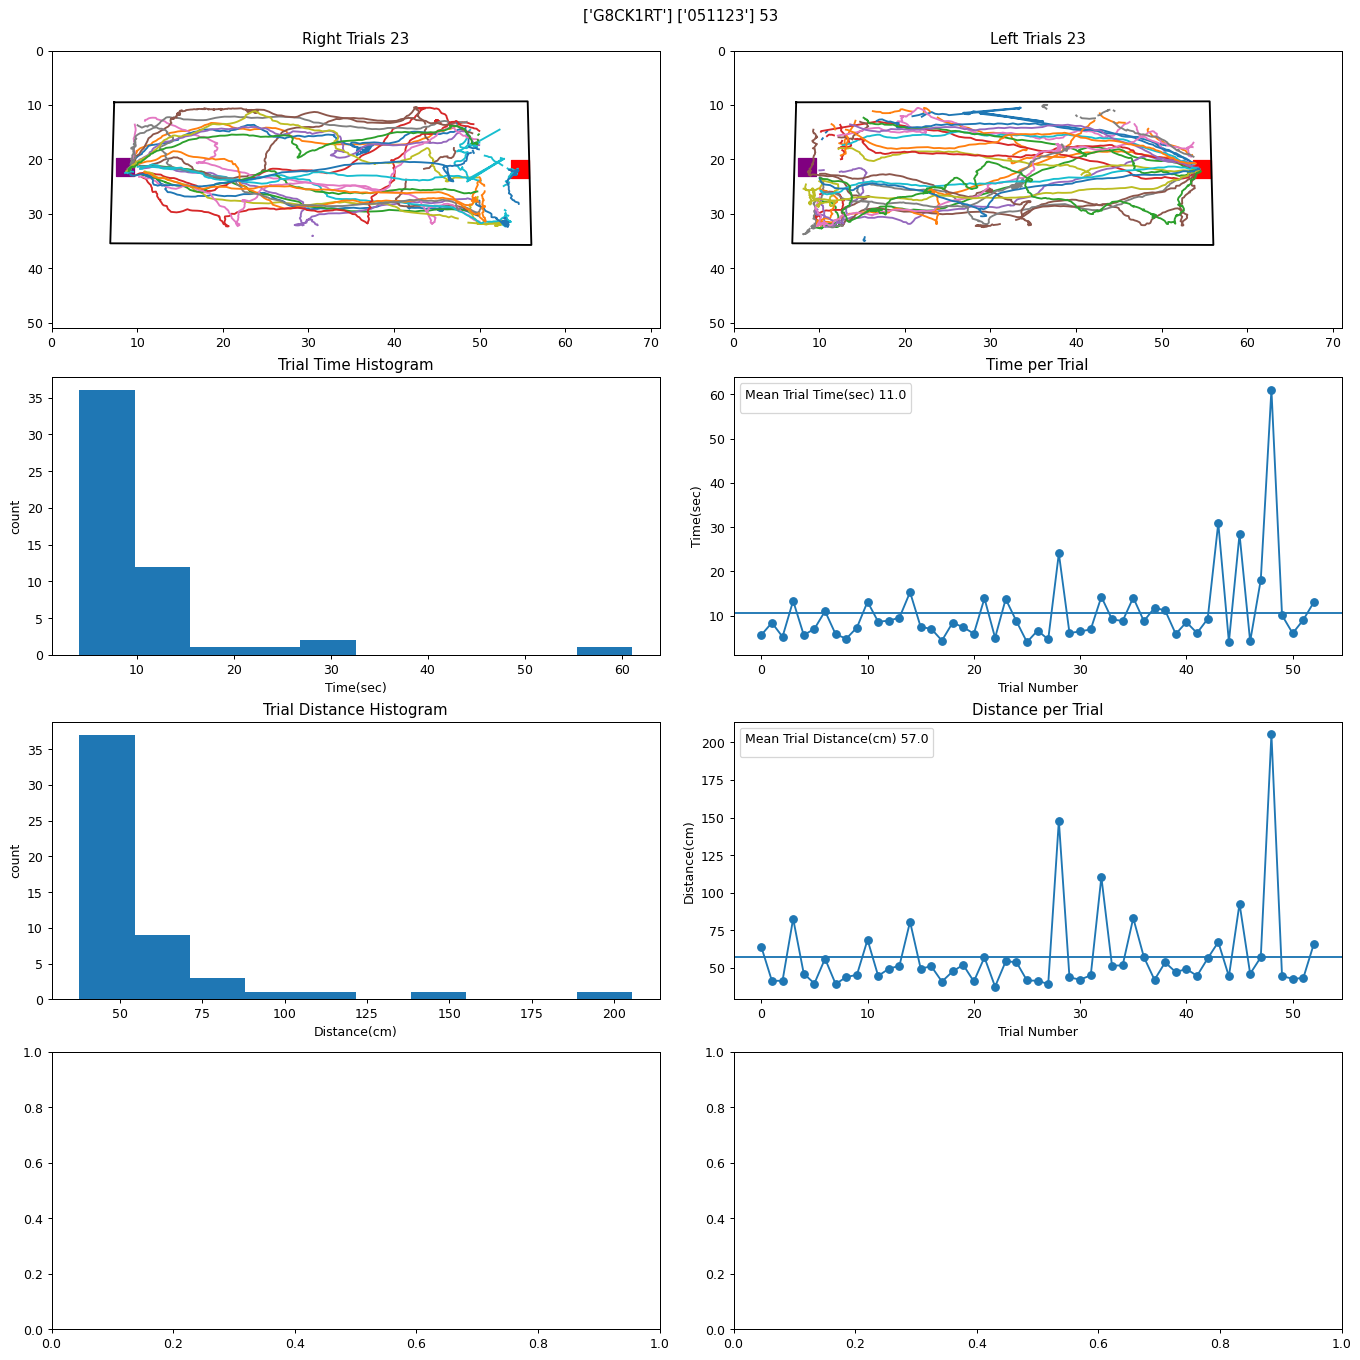

In [11]:
session.train_day_summary()

In [4]:
right,left = df[df['odd']=='right'],df[df['odd']=='left']
right = right.loc[right['dist']<70]
left = left.loc[left['dist']<70]

In [5]:
np.nanmean(right['resample_angle_to_leftport'])

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [6]:
right['resample_angle_to_leftport']

1     [63.867444043518994, 59.37490073961979, 50.461...
5     [15.368137486432776, 13.288268132882989, 17.37...
7     [67.9183832859288, 69.85259142886089, 52.68778...
9     [nan, nan, nan, nan, nan, nan, nan, nan, nan, ...
11    [45.89644136385027, 39.25619602242145, 34.8668...
13    [44.60412354511444, 26.02390632063116, 18.8933...
15    [87.0354466264747, 92.1123550528097, 91.430379...
17    [38.11021051664033, 35.45502158943374, 33.0726...
19    [52.56535975934911, 71.78940043071599, 64.2227...
21    [50.31510937577488, 49.434314555290186, 51.949...
23    [46.990292427645116, 60.9435088586789, 52.0514...
25    [37.29064388752041, 36.579329801717904, 36.535...
27    [45.21514196721023, 45.04421834328177, 43.8117...
29    [nan, nan, nan, nan, nan, nan, nan, nan, nan, ...
31    [46.12809612408129, 46.14082827807734, 46.4628...
33    [nan, nan, nan, nan, nan, nan, nan, nan, nan, ...
37    [nan, nan, nan, nan, nan, nan, nan, nan, nan, ...
39    [50.87861183128837, 51.405246729337605, 62

In [7]:
right.at[9,'resample_angle_to_leftport']

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, na

In [11]:
interp = pd.Series(right.at[9,'angle_to_leftport'].astype(float)).interpolate().values

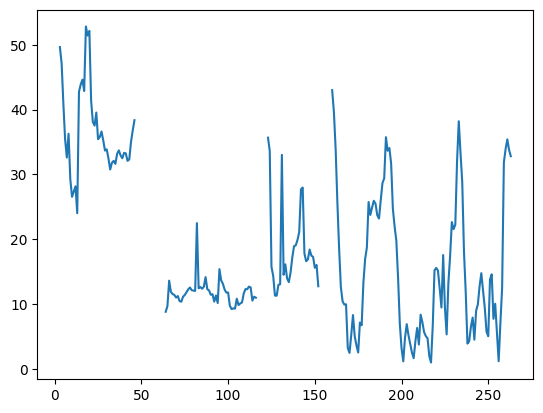

In [8]:
plt.plot(right.at[9,'angle_to_leftport'])

In [9]:
right.at[9,'angle_to_leftport']

array([nan, nan, nan, 49.64872329271892, 47.12854343928254,
       40.93402705021812, 35.42065159696129, 32.59585837376229,
       36.25953723648715, 29.258460363197784, 26.528844223745832,
       27.367223765355206, 28.15111293820985, 23.99817403213545,
       42.74660897795325, 43.86126825229637, 44.607391524909524,
       42.85976420148786, 52.81670704708276, 51.41589984073485,
       52.136079916454456, 41.37952503655039, 38.08667113995005,
       37.51660505028861, 39.537112989890495, 35.422992019287555,
       35.7606527204795, 36.606819216770326, 35.23962856431212,
       33.66915110717786, 33.85931013489537, 32.45304701861,
       30.746680148946353, 31.778358944288, 32.0807219500771,
       31.614765752494993, 33.171233286927794, 33.69590266239719,
       32.9263565798869, 32.48428481228941, 33.31281470614575,
       33.23453338086067, 32.0803023817751, 32.306363887828766,
       34.99109588278406, 36.778436898265824, 38.35749479206569, nan, nan,
       nan, nan, nan, nan, nan

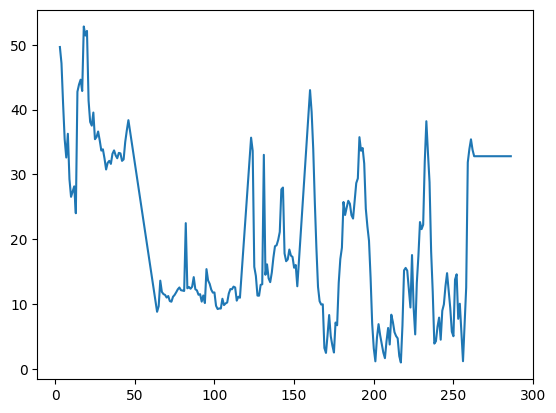

In [12]:
plt.plot(interp)

In [14]:
interp[~np.isnan(interp)]

array([49.64872329, 47.12854344, 40.93402705, 35.4206516 , 32.59585837,
       36.25953724, 29.25846036, 26.52884422, 27.36722377, 28.15111294,
       23.99817403, 42.74660898, 43.86126825, 44.60739152, 42.8597642 ,
       52.81670705, 51.41589984, 52.13607992, 41.37952504, 38.08667114,
       37.51660505, 39.53711299, 35.42299202, 35.76065272, 36.60681922,
       35.23962856, 33.66915111, 33.85931013, 32.45304702, 30.74668015,
       31.77835894, 32.08072195, 31.61476575, 33.17123329, 33.69590266,
       32.92635658, 32.48428481, 33.31281471, 33.23453338, 32.08030238,
       32.30636389, 34.99109588, 36.7784369 , 38.35749479, 36.71485272,
       35.07221065, 33.42956858, 31.78692651, 30.14428443, 28.50164236,
       26.85900029, 25.21635822, 23.57371615, 21.93107408, 20.288432  ,
       18.64578993, 17.00314786, 15.36050579, 13.71786372, 12.07522165,
       10.43257958,  8.7899375 ,  9.64890785, 13.59272827, 11.8558325 ,
       11.51873949, 11.39864392, 10.98604601, 11.21835797, 10.44

In [15]:
resample = signal.resample(interp[~np.isnan(interp)],200)

In [16]:
resample

array([46.97221279, 45.91769452, 34.97966449, 34.63419734, 32.10736035,
       26.09071793, 28.0795924 , 26.26677535, 44.04161374, 43.27367191,
       46.03214456, 52.94370802, 50.25505544, 39.25839437, 37.99593013,
       38.13823537, 35.15889919, 36.71738797, 34.04852949, 33.86069096,
       31.54693443, 31.43367606, 31.99182916, 32.35669403, 33.90786431,
       32.33888118, 33.40672692, 32.68367486, 32.24517956, 35.09888245,
       38.01611518, 36.80021593, 34.33704629, 31.99190077, 29.72899037,
       27.29406287, 25.08741686, 22.6087373 , 20.44265625, 17.92009813,
       15.80827397, 13.21074588, 11.20904316,  8.54821332, 11.70952965,
       12.65488795, 11.09792254, 11.44842816, 10.73854991, 10.57796369,
       10.72299672, 11.93191107, 11.72633998, 13.13195433, 10.84571829,
       15.26463559, 18.15043326, 10.93247964, 13.36549661, 12.90636688,
       13.08359643, 11.10594566, 11.75893345, 10.15559474, 11.56194813,
       14.2246739 , 13.61694758, 11.72938682, 12.17935052,  9.67

In [31]:
df1 = session1.df

In [82]:
time_list = []
date_list = []
by_animal = RT.groupby('animal')
for animal,aniframe in by_animal:
    by_date = aniframe.groupby('date')
    for date,dateframe in by_date:
        mean_time = dateframe.time.mean() 
        time_list.append(mean_time)
        date_list.append(date)
time_dict = dict(zip(date_list,mean_list))

dist_list = []
date_list = []
by_animal = RT.groupby('animal')
for animal,aniframe in by_animal:
    by_date = aniframe.groupby('date')
    for date,dateframe in by_date:
        mean_dist = dateframe.dist.mean() 
        time_list.append(mean_dist)
        date_list.append(date)
dist_dict = dict(zip(date_list,mean_list))



    


In [88]:
RT.dist.min()

6.4051861647737525

In [104]:
x = RT.loc[['dist'] == 6.4051861647737525]

KeyError: 'False: boolean label can not be used without a boolean index'

In [98]:
x

,first_poke,second_poke,trial_timestamps,trial_vidframes,nose_x,nose_y,nose_likelihood,leftear_x,leftear_y,leftear_likelihood,...,ts_tailbase_x_cm,ts_tailbase_y_cm,dist,angle_to_rightport,angle_to_leftport,resample_angle_to_leftport,resample_angle_to_rightport,resample_ts_nose_x_cm,resample_ts_nose_y_cm,time
946,50247.852441,50249.396800,"[50247.865958, 50247.882073, 50247.898931, 502...","[72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 8...","[681.4813842773438, 681.8900756835938, 682.327...","[256.14532470703125, 256.33013916015625, 256.6...","[0.8762069940567017, 0.9127772450447083, 0.914...","[674.5267944335938, 674.620361328125, 675.0187...","[250.73931884765625, 251.03488159179688, 251.7...","[0.9993605017662048, 0.9995272159576416, 0.999...",...,"[51.19552386516377, 51.392353395114114, 51.492...","[20.53594469149213, 20.6890620243538, 20.74446...",6.405186,"[158.57219538616337, 158.930922238018, 158.025...","[32.89895023469996, 28.6738629887164, 24.90043...","[32.89895023469998, 18.748286000171035, 13.714...","[158.5721953861634, 174.04300810799688, 178.93...","[49.817455768141635, 49.3640225033806, 49.1783...","[15.929346866266114, 15.63632537146944, 15.607...",1.516667
dist,6.405186,6.405186,6.405186,6.405186,6.405186,6.405186,6.405186,6.405186,6.405186,6.405186,...,6.405186,6.405186,6.405186,6.405186,6.405186,6.405186,6.405186,6.405186,6.405186,6.405186


In [103]:
x['ts_nose_x_cm']

946     [49.81745576814163, 49.48277344367402, 49.1123...
dist                                             6.405186
Name: ts_nose_x_cm, dtype: object

ValueError: setting an array element with a sequence.

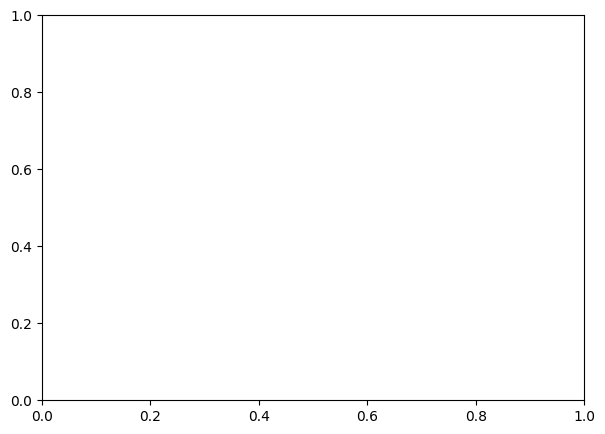

In [99]:
plt.plot(x['ts_nose_x_cm'],x['ts_nose_y_cm'])

In [84]:
dist_dict

{'041723': 33.48809523809524,
 '041823': 15.716228070175436,
 '041923': 18.472222222222225,
 '042023': 11.78888888888889,
 '042123': 7.574999999999999,
 '042423': 7.804526748971193,
 '042523': 6.153586497890295}

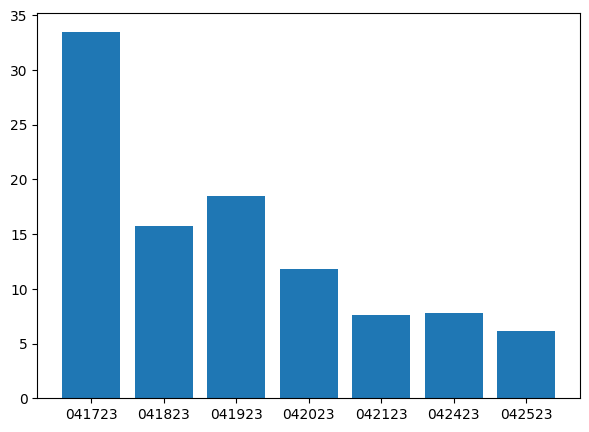

In [76]:
plt.rcParams["figure.figsize"] = (7,5)
date = list(time_dict.keys())
time = list(time_dict.values())

plt.bar(range(len(time_dict)), time, tick_label=date)
plt.show()


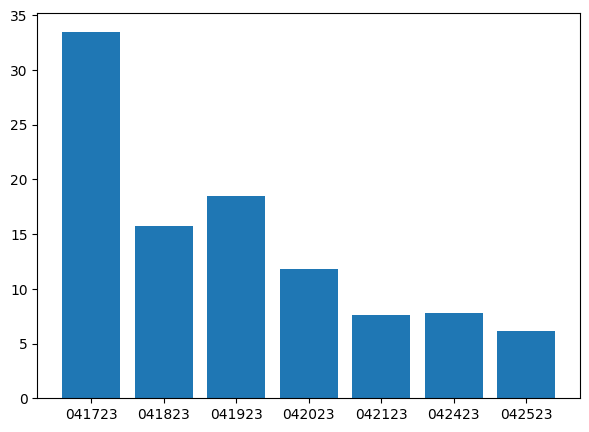

In [83]:
plt.rcParams["figure.figsize"] = (7,5)
date = list(dist_dict.keys())
dist = list(dist_dict.values())

plt.bar(range(len(dist_dict)), dist, tick_label=date)
plt.show()


In [70]:
len(time_dict)

7

In [48]:
RT = df1[df1['animal'] == 'G8CKRT']

In [55]:
RT

,first_poke,second_poke,trial_timestamps,trial_vidframes,nose_x,nose_y,nose_likelihood,leftear_x,leftear_y,leftear_likelihood,...,ts_tailbase_x_cm,ts_tailbase_y_cm,dist,angle_to_rightport,angle_to_leftport,resample_angle_to_leftport,resample_angle_to_rightport,resample_ts_nose_x_cm,resample_ts_nose_y_cm,time
0,41388.360998,41399.817907,"[41388.378124, 41388.394291, 41388.410905, 413...","[2685, 2686, 2687, 2688, 2689, 2690, 2691, 269...","[545.1400756835938, 543.4581909179688, 541.306...","[317.42425537109375, 318.0392150878906, 317.74...","[0.9997788071632385, 0.9996974468231201, 0.999...","[561.7388916015625, 560.484130859375, 560.5294...","[294.88128662109375, 294.68212890625, 295.5612...","[0.9999123811721802, 0.9998809099197388, 0.999...",...,"[43.76197909885572, 43.78012467676793, 43.7886...","[19.961999636946228, 19.979993384512643, 19.95...",75.727853,"[120.74462572270372, 121.32301677984962, 125.2...","[78.66601965362995, 77.8704063997991, 74.04559...","[62.7117444595351, 74.71669339762886, 67.93796...","[128.7021937513523, 126.37630141671714, 130.89...","[31.744903247229885, 46.47010753410711, 42.026...","[25.108246012602574, 25.830232992066012, 25.59...",11.433333
1,41399.817907,41413.503846,"[41399.831424, 41399.849177, 41399.864857, 413...","[[3372, 3373, 3374, 3375, 3376, 3377, 3378, 33...","[121.09584045410156, 124.38159942626953, nan, ...","[297.0638122558594, 292.75946044921875, nan, 2...","[0.8224160075187683, 0.9071400761604309, 0.644...","[126.86628723144531, 128.00230407714844, 130.3...","[307.7274475097656, 305.7265625, 307.465911865...","[0.9998294115066528, 0.9995700716972351, 0.999...",...,"[11.772069578638932, 11.729079371703653, 11.33...","[25.827042955164597, 25.80364873798145, 25.085...",66.793583,"[15.601437161866103, 21.050826028790873, 20.12...","[175.12846146722188, 178.6040459437873, 179.92...","[150.16028070373434, 185.03632880100216, 175.1...","[48.37504512421759, 12.942270743497874, 20.535...","[19.50055618019953, 16.283260099444178, 18.750...","[20.008960327763184, 23.867261281151734, 22.93...",13.666667
2,41413.503846,41416.199091,"[41413.520627, 41413.536179, 41413.552921, 414...","[4193, 4194, 4195, 4196, 4197, 4198, 4199, 420...","[313.64910888671875, 313.2987976074219, 313.25...","[177.5318603515625, 177.07142639160156, 177.02...","[0.9955424666404724, 0.99493008852005, 0.99341...","[307.6886901855469, 307.2309265136719, 306.662...","[200.0830841064453, 199.74807739257812, 199.77...","[0.9997076392173767, 0.9997639060020447, 0.999...",...,"[23.393464203381523, 23.420169062738857, 23.41...","[20.01243570279079, 20.017959611713042, 20.034...",30.057520,"[106.45608541541007, 105.79431497489043, 104.7...","[97.11243354105771, 97.93778387566387, 98.7975...","[97.11243354105765, 94.01343854361757, 102.356...","[106.45608541541004, 108.62447336365145, 102.3...","[25.373329443775972, 23.493873873323338, 27.32...","[14.36182744295171, 14.492222569111082, 14.152...",2.666667
3,41416.199091,41438.684121,"[41416.203481, 41416.220454, 41416.237913, 414...","[[4354, 4355, 4356, 4357, 4358, 4359, 4360, 43...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[0.5802072286605835, 0.45672690868377686, 0.46...","[655.4010009765625, 658.0267944335938, 657.893...","[129.61993408203125, 131.11961364746094, 131.0...","[0.9914686679840088, 0.9931508302688599, 0.993...",...,"[50.7775434017944, 50.82423802228849, 50.74372...","[10.608485012214889, 10.690247505015648, 10.67...",103.722456,"[74.77638814428562, 73.68758222289932, 75.9094...","[44.076980710656116, 46.13591926669672, 44.257...","[44.42953183099404, 41.719574571409055, 36.739...","[93.68237667192948, 76.6590088196336, 91.31222...","[33.061913802322096, 52.9115626264252, 46.9819...","[18.47815735772225, 15.770683691798027, 16.586...",22.466667
4,41438.684121,41477.227417,"[41438.695846, 41438.711462, 41438.728281, 414...","[5703, 5704, 5705, 5706, 5707, 5708, 5709, 571...","[nan, nan, 114.995697

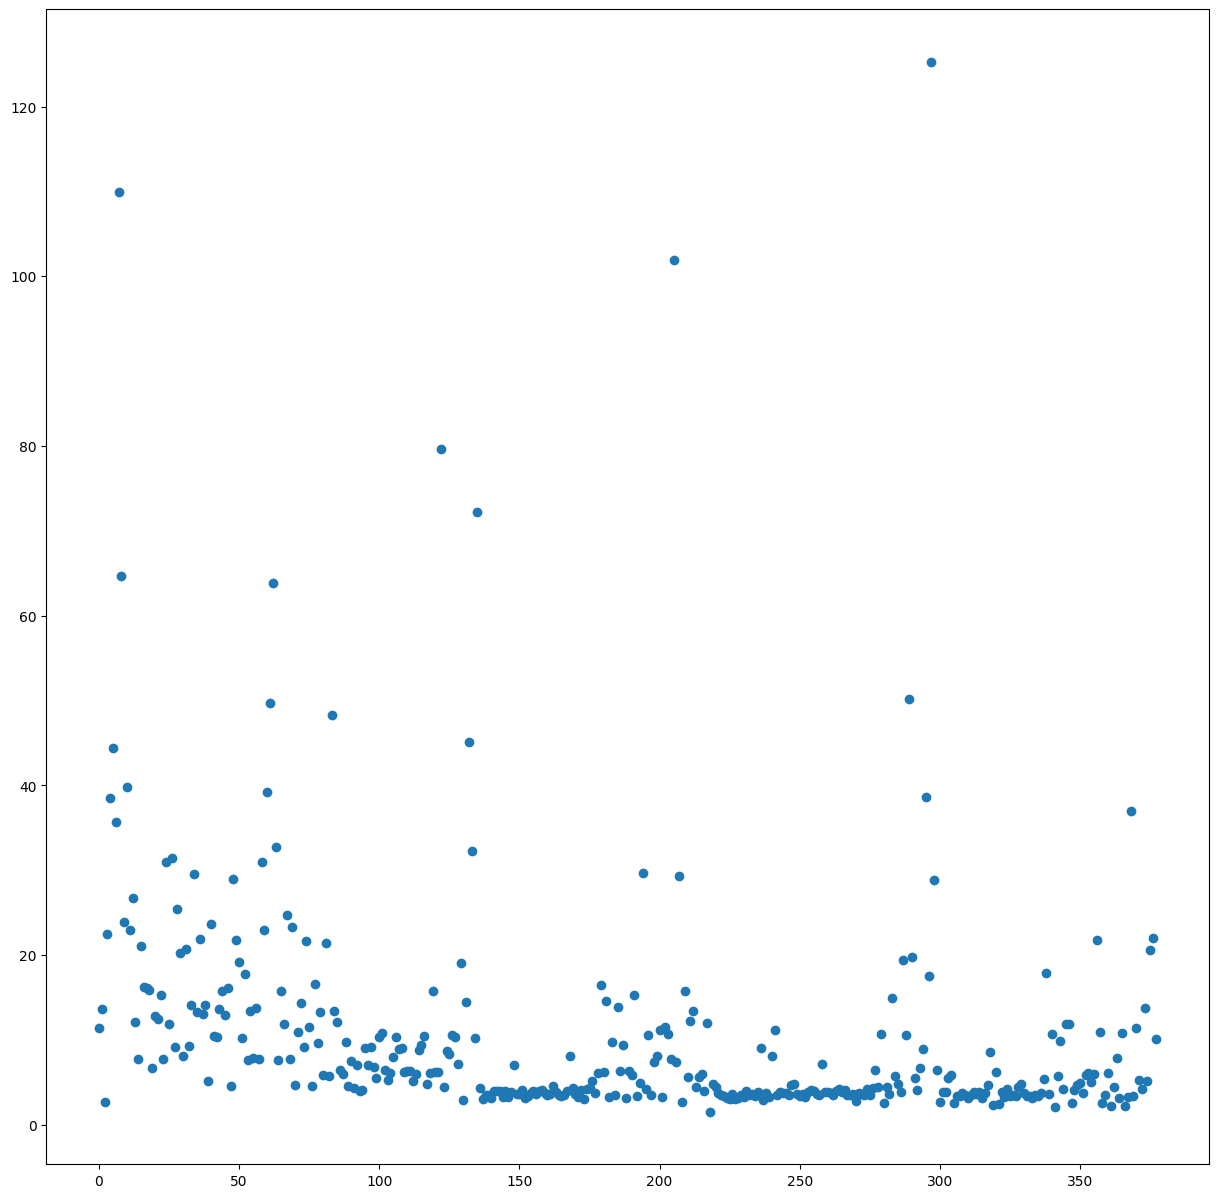

In [60]:
plt.plot(range(len(RT)),RT['time'],'o')
plt.rcParams["figure.figsize"] = (15,15)

(array([306.,  43.,  14.,   8.,   0.,   3.,   1.,   0.,   2.,   1.]),
 array([  1.51666667,  13.89333333,  26.27      ,  38.64666667,
         51.02333333,  63.4       ,  75.77666667,  88.15333333,
        100.53      , 112.90666667, 125.28333333]),
 <BarContainer object of 10 artists>)

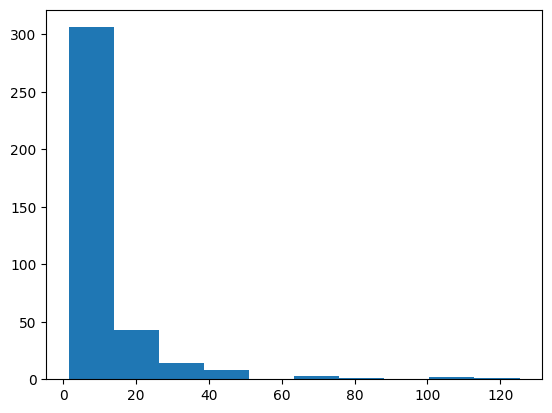

In [49]:
plt.hist(RT['time'])

In [61]:
RT['date'].to_list()

['041723',
 '041723',
 '041723',
 '041723',
 '041723',
 '041723',
 '041723',
 '041723',
 '041723',
 '041723',
 '041723',
 '041723',
 '041723',
 '041723',
 '041823',
 '041823',
 '041823',
 '041823',
 '041823',
 '041823',
 '041823',
 '041823',
 '041823',
 '041823',
 '041823',
 '041823',
 '041823',
 '041823',
 '041823',
 '041823',
 '041823',
 '041823',
 '041823',
 '041823',
 '041823',
 '041823',
 '041823',
 '041823',
 '041823',
 '041823',
 '041823',
 '041823',
 '041823',
 '041823',
 '041823',
 '041823',
 '041823',
 '041823',
 '041823',
 '041823',
 '041823',
 '041823',
 '041923',
 '041923',
 '041923',
 '041923',
 '041923',
 '041923',
 '041923',
 '041923',
 '041923',
 '041923',
 '041923',
 '041923',
 '041923',
 '041923',
 '041923',
 '041923',
 '041923',
 '041923',
 '041923',
 '041923',
 '041923',
 '041923',
 '041923',
 '041923',
 '041923',
 '041923',
 '041923',
 '041923',
 '041923',
 '041923',
 '041923',
 '041923',
 '041923',
 '042023',
 '042023',
 '042023',
 '042023',
 '042023',
 '042023',

In [13]:

df1 = session1.df

In [14]:
df1

,first_poke,second_poke,trial_timestamps,trial_vidframes,nose_x,nose_y,nose_likelihood,leftear_x,leftear_y,leftear_likelihood,...,ts_midspine_x_cm,ts_midspine_y_cm,ts_tailbase_x,ts_tailbase_y,ts_tailbase_x_cm,ts_tailbase_y_cm,dist,time,angle_to_rightport,angle_to_leftport
0,41388.360998,41399.817907,"[41388.378124, 41388.394291, 41388.410905, 413...","[2685, 2686, 2687, 2688, 2689, 2690, 2691, 269...","[545.1400756835938, 543.4581909179688, 541.306...","[317.42425537109375, 318.0392150878906, 317.74...","[0.9997788071632385, 0.9996974468231201, 0.999...","[561.7388916015625, 560.484130859375, 560.5294...","[294.88128662109375, 294.68212890625, 295.5612...","[0.9999123811721802, 0.9998809099197388, 0.999...",...,"[44.43139539029137, 44.43346423305197, 44.4466...","[21.321342894823598, 21.358177183592332, 21.37...","[540.9580078125, 541.1823120117188, 541.287658...","[246.75765991210938, 246.98008728027344, 246.7...","[43.76197909885572, 43.78012467676793, 43.7886...","[19.961999636946228, 19.979993384512643, 19.95...",75.727853,11.433333,"[120.74462572270372, 121.32301677984962, 125.2...","[78.66601965362995, 77.8704063997991, 74.04559..."
1,41399.817907,41413.503846,"[41399.831424, 41399.849177, 41399.864857, 413...","[[3372, 3373, 3374, 3375, 3376, 3377, 3378, 33...","[121.09584045410156, 124.38159942626953, nan, ...","[297.0638122558594, 292.75946044921875, nan, 2...","[0.8224160075187683, 0.9071400761604309, 0.644...","[126.86628723144531, 128.00230407714844, 130.3...","[307.7274475097656, 305.7265625, 307.465911865...","[0.9998294115066528, 0.9995700716972351, 0.999...",...,"[12.410108833003116, 12.51061434995483, 12.585...","[23.758963049469564, 23.694532669557606, 23.63...","[145.51890563964844, 144.98748779296875, 140.1...","[319.25762939453125, 318.96844482421875, 310.0...","[11.772069578638932, 11.729079371703653, 11.33...","[25.827042955164597, 25.80364873798145, 25.085...",66.793583,13.666667,"[15.601437161866103, 21.050826028790873, 20.12...","[175.12846146722188, 178.6040459437873, 179.92..."
2,41413.503846,41416.199091,"[41413.520627, 41413.536179, 41413.552921, 414...","[4193, 4194, 4195, 4196, 4197, 4198, 4199, 420...","[313.64910888671875, 313.2987976074219, 313.25...","[177.5318603515625, 177.07142639160156, 177.02...","[0.9955424666404724, 0.99493008852005, 0.99341...","[307.6886901855469, 307.2309265136719, 306.662...","[200.0830841064453, 199.74807739257812, 199.77...","[0.9997076392173767, 0.9997639060020447, 0.999...",...,"[24.822279102408505, 24.83747448091866, 24.783...","[18.516432789766416, 18.48489775038388, 18.534...","[289.1752624511719, 289.50537109375, 289.47656...","[247.38111877441406, 247.44940185546875, 247.6...","[23.393464203381523, 23.420169062738857, 23.41...","[20.01243570279079, 20.017959611713042, 20.034...",30.057520,2.666667,"[106.45608541541007, 105.79431497489043, 104.7...","[97.11243354105771, 97.93778387566387, 98.7975..."
3,41416.199091,41438.684121,"[41416.203481, 41416.220454, 41416.237913, 414...","[[4354, 4355, 4356, 4357, 4358, 4359, 4360, 43...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[0.5802072286605835, 0.45672690868377686, 0.46...","[655.4010009765625, 658.0267944335938, 657.893...","[129.61993408203125, 131.11961364746094, 131.0...","[0.9914686679840088, 0.9931508302688599, 0.993...",...,"[51.65599675077872, 51.59966892688144, 51.5872...","[12.293324140438733, 12.367286503523353, 12.41...","[627.6799926757812, 628.2572021484375, 627.261...","[131.13540649414062, 132.14610290527344, 132.0...","[50.7775434017944, 50.82423802228849, 50.74372...","[10.608485012214889, 10.690247505015648, 10.67...",103.722456,22.466667,"[74.77638814428562, 73.68758222289932, 75.9094...","[44.076980710656116, 46.13591926669672, 44.257..."
4,41438.684121,41477.227417,"[41438.695846, 41438.711462, 41438.728281, 414...","[5703, 5704, 5705, 5706, 5707, 5708, 5709, 571...","[nan, nan, 114.99569702148438, nan, nan, nan, ...","[nan, 

In [631]:
raw_h5

['D:\\obstacle_avoidance\\recordings\\041723\\G8CKRT\\oa\\non_obstacleG8CKRT_041723_oa.h5']

In [628]:
df1

""


In [5]:
def create_dict_from_dataframe(df, column_name):
    dictionary = {}
    for index, row in df.iterrows():
        dictionary[index] = row[column_name]
    return dictionary



In [88]:
diff_array = df['nose_x_cm'].to_numpy()

In [48]:
# total distance traveld in cm
for ind,row in df.iterrows(): 
    dist = np.nansum(np.abs(np.diff(row['ts_nose_x_cm'])))
    df.at[ind,'dist'] = dist

In [573]:
# resample port angle 
right_left = ['angle_to_leftport','angle_to_rightport','ts_nose_x_cm','ts_nose_y_cm']
for ind,row in df.iterrows():
    for direction in right_left:
        interp = pd.Series(row[direction].astype(float)).interpolate().values
        resample = signal.resample(interp,200)
        df.at[ind,'resample_'+ direction] = resample.astype(object)

In [445]:
pd.unique(df['date']).item()

'042523'

In [520]:
savepath = "D:/obstacle_avoidance/recordings"
dates = pd.unique(df1['date']).tolist()
animals = pd.unique(df1['animal']).tolist()
tasks = ['oa']
paths=[]
for date in dates:
    for animal in animals:
        for task in tasks:
            session_path = os.path.join(*[savepath, str(date), str(animal),str(task)])
            paths.append(session_path)


In [515]:
self.session_path = os.path.join(*[self.path, str(self.s['date']), str(self.s['animal']),str(self.s['task'])])

['oa', 'oa1']

df = pd.head_D:\obstacle_avoidance\recordings\051123\G8CK1RT\oa

In [567]:
df

,first_poke,second_poke,trial_timestamps,trial_vidframes,nose_x,nose_y,nose_likelihood,leftear_x,leftear_y,leftear_likelihood,...,ts_spine_x_cm,ts_spine_y_cm,ts_midspine_x_cm,ts_midspine_y_cm,ts_tailbase_x,ts_tailbase_y,ts_tailbase_x_cm,ts_tailbase_y_cm,dist,time
0,53426.162444,53434.899929,"[53426.167321, 53426.184307, 53426.200307, 534...","[73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 8...","[nan, 673.6224975585938, 672.9051513671875, na...","[nan, 272.7643127441406, 271.76934814453125, n...","[0.7070292234420776, 0.7535440325737, 0.773416...","[671.01171875, 669.7388916015625, 669.32751464...","[250.2323760986328, 251.0310516357422, 250.809...","[0.9964287877082825, 0.996070146560669, 0.9973...",...,"[51.34706771872651, 51.20315730033642, 51.1048...","[20.482398506805858, 20.650224554900795, 20.93...","[52.03134589193268, 52.074216226635045, 52.100...","[19.45923685383579, 19.658696063919557, 19.847...","[647.8184814453125, 650.5279541015625, 650.998...","[226.2098846435547, 229.88343811035156, 232.34...","[51.42045936754628, 51.6355232050542, 51.67289...","[17.955363292353322, 18.246950846867826, 18.44...",94.253742,8.716667
1,53434.899929,53442.154508,"[53434.903142, 53434.920064, 53434.93742, 5343...","[[597, 598, 599, 600, 601, 602, 603, 604, 605,...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[0.5140419602394104, 0.5618018507957458, 0.585...","[673.1302490234375, 673.3390502929688, 673.527...","[248.87635803222656, 249.27664184570312, 249.7...","[0.9987668991088867, 0.9985851049423218, 0.998...",...,"[51.174399439923576, 51.04425268080453, 50.978...","[21.601929997938374, 21.696592095906162, 21.80...","[51.510482710233525, 51.515811828571486, 51.63...","[20.448694255644778, 20.67930216241392, 20.892...","[635.2792358398438, 640.5049438476562, 645.014...","[239.44781494140625, 240.15736389160156, 241.8...","[50.42515931417768, 50.839948817686256, 51.197...","[19.00612130017121, 19.062441602860634, 19.199...",58.173498,7.233333
2,53442.154508,53445.366092,"[53442.155942, 53442.172518, 53442.189747, 534...","[1032, 1033, 1034, 1035, 1036, 1037, 1038, 103...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[0.029678015038371086, 0.01830548793077469, 0....","[113.75566864013672, 113.06996154785156, 113.0...","[257.8464660644531, 257.7375183105469, 257.895...","[0.999966025352478, 0.999967098236084, 0.99995...",...,"[13.911621030529904, 14.378698874239939, 14.76...","[15.339954339571792, 15.13205089924888, 14.925...","[12.315514964576455, 12.57168689424544, 13.110...","[16.663382742967684, 16.440626807604225, 16.13...","[139.05418395996094, 140.44464111328125, 142.4...","[224.2821502685547, 222.7217559814453, 213.976...","[11.037397389849065, 11.14776464179147, 11.309...","[17.802349770911395, 17.678493793757657, 16.98...",36.609937,3.200000
3,53445.366092,53449.368204,"[53445.373363, 53445.390412, 53445.406963, 534...","[[1225, 1226, 1227, 1228, 1229, 1230, 1231, 12...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[0.3286152184009552, 0.33887648582458496, 0.26...","[673.6375732421875, 675.064208984375, 674.4838...","[249.24696350097656, 248.30307006835938, 249.6...","[0.9984482526779175, 0.9984639883041382, 0.998...",...,"[51.467912744019294, 51.278356004738065, 50.98...","[24.094128523583016, 24.200233692018312, 24.30...","[52.07721506686341, 51.97525934375217, 51.7247...","[23.06363448824522, 23.18693090797347, 23.3186...","[649.9027099609375, 651.1729125976562, 653.076...","[260.83233642578125, 263.50921630859375, 265.9...","[51.58589457936869, 51.686716653669855, 51.837...","[20.703513315953877, 20.91599010874137, 21.109...",41.045391,3.983333
4,53449.368204,53462.320768,"[53449.375539, 53449.391833, 53449.408499, 534...","[1465, 1466, 1467, 1468, 1469, 1470, 1471, 147...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan

In [591]:
count, bins = np.histogram(np.mean(right['resample_angle_to_leftport'],axis =0 ))

In [593]:
sum(count)

200

(0.0, 180.0)

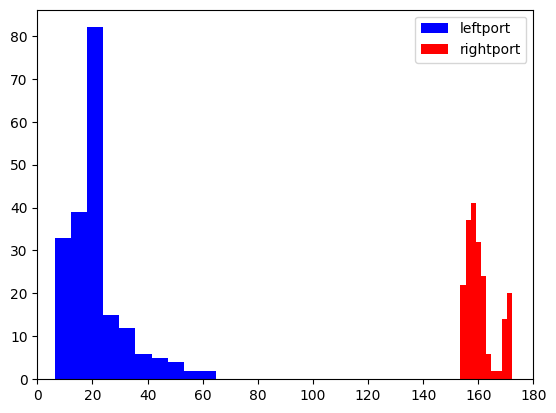

In [600]:
plt.hist(np.mean(right['resample_angle_to_leftport'],axis = 0 ),bins = 10,color='b',label='leftport' )
plt.hist(np.mean(right['resample_angle_to_rightport'],axis = 0),bins = 10, color = 'r',label='rightport')
plt.legend()
plt.xlim(0,180)
#plt.title.set_text('Right Trials')

In [15]:
#Summary Figure Single Day 
## set pdf 
# common save path
def train_day_summary(df):
    savepath = "D:/obstacle_avoidance/recordings"
# analyze by each animal and date 
    by_animal = df.groupby(['animal'])
    for animal,animal_frame in by_animal:
        by_date = animal_frame.groupby(['date'])
        for date, date_frame in by_date:
            df = date_frame
            df = df.reset_index()
            # set up pdf page
            savepath_session = os.path.join(*[savepath,str(pd.unique(df.date).item()),str(pd.unique(df.animal).item()),str(pd.unique(df.task).item())])
            pdf = PdfPages(os.path.join((savepath_session),(str(pd.unique(df.date).item()) + '_' + str(pd.unique(df.animal).item()))+ '_summary.pdf'))

            fig = plt.figure(constrained_layout=False, figsize=(15, 15),dpi=90)
            spec2 = gridspec.GridSpec(ncols=2, nrows=4, figure=fig)
            plt.suptitle(str(pd.unique(df.animal)) + " " + str(pd.unique(df.date) ) + " " + str(len(df)))
            ax1 = fig.add_subplot(spec2[0,0])
            ax2 = fig.add_subplot(spec2[0,1])
            ax3 = fig.add_subplot(spec2[1,0])
            ax4 = fig.add_subplot(spec2[1,1])
            ax5 = fig.add_subplot(spec2[2,0])
            ax6 = fig.add_subplot(spec2[2,1])
            ax7 = fig.add_subplot(spec2[3,0])
            ax8 = fig.add_subplot(spec2[3,1])


            ##left and right trajectories

            right,left = df[df['odd']=='right'],df[df['odd']=='left']
            right = right.loc[right['dist']<70]
            left = left.loc[left['dist']<70]
            right_nose_x,right_nose_y=right['ts_nose_x_cm'].to_numpy(), right['ts_nose_y_cm'].to_numpy() 
            left_nose_x,left_nose_y=left['ts_nose_x_cm'].to_numpy(), left['ts_nose_y_cm'].to_numpy() 



            arena_x = pd.unique(df[['mean_arenaTL_x_cm',
            'mean_arenaTR_x_cm','mean_arenaBR_x_cm',
            'mean_arenaBL_x_cm',
            'mean_arenaTL_x_cm']].values.ravel('K'))

            arena_y = pd.unique(df[['mean_arenaTL_y_cm',
            'mean_arenaTR_y_cm','mean_arenaBR_y_cm',
            'mean_arenaBL_y_cm',
            'mean_arenaTL_y_cm']].values.ravel('K'))

            left_port =  pd.unique(df[['mean_leftportT_x_cm','mean_leftportT_y_cm']].values.ravel('K'))

            right_port = pd.unique(df[['mean_rightportT_x_cm','mean_rightportT_y_cm']].values.ravel('K'))


            for ind in range(len(right)):
                ax1.plot(right_nose_x[ind],right_nose_y[ind])
            ax1.set_ylim([51,0]); ax1.set_xlim([0, 71])
            ax1.title.set_text('Right Trials'+' '+ str(len(right)))

            ax1.plot([arena_x[0],arena_x[1],arena_x[2],arena_x[3],arena_x[0]],
                      [arena_y[0],arena_y[1],arena_y[2],arena_y[3],arena_y[0]],c='k')

            ax1.scatter(left_port[0],left_port[1],c='purple',s=300,marker = 's')
            ax1.scatter(right_port[0],right_port[1],c='r',s=300,marker = 's')

            for ind in range(len(left)):
                ax2.plot(left_nose_x[ind],left_nose_y[ind])
            ax2.set_ylim([51,0]); ax2.set_xlim([0, 71])
            ax2.title.set_text('Left Trials'+' '+ str(len(left)))
            ax2.plot([arena_x[0],arena_x[1],arena_x[2],arena_x[3],arena_x[0]],
                      [arena_y[0],arena_y[1],arena_y[2],arena_y[3],arena_y[0]],c='k')

            ax2.scatter(left_port[0],left_port[1],c='purple',s=300,marker = 's')
            ax2.scatter(right_port[0],right_port[1],c='r',s=300,marker = 's')



            ## Trial time 
            #histogram
            ax3.hist(df['time'])
            ax3.set_xlabel('Time(sec)')
            ax3.set_ylabel('count')
            ax3.title.set_text('Trial Time Histogram')

            ax4.plot(df.index,df['time'],'-o')
            ax4.set_xlabel('Trial Number')
            ax4.set_ylabel('Time(sec)')
            ax4.axline((0,df['time'].mean()),slope=0)
            ax4.legend(title ='Mean Trial Time(sec) ' + str(np.round(df['time'].mean())))
            ax4.title.set_text('Time per Trial')
            ## Trial distance

            ax5.hist(df['dist'])
            ax5.set_xlabel('Distance(cm)')
            ax5.set_ylabel('count')
            ax5.title.set_text('Trial Distance Histogram')

            ax6.plot(df.index,df['dist'],'-o')
            ax6.set_xlabel('Trial Number')
            ax6.set_ylabel('Distance(cm)')
            ax6.axline((0,df['dist'].mean()),slope=0)
            ax6.legend(title ='Mean Trial Distance(cm) ' + str(np.round(df['dist'].mean())))
            ax6.title.set_text('Distance per Trial')

            ## angle to port

            #right starting 
            ax7.hist(np.mean(right['resample_angle_to_leftport']),color='b',label='leftport')
            ax7.hist(np.mean(right['resample_angle_to_rightport']),color = 'r',label='rightport')
            ax7.legend()
            ax7.set_xlim(0,180)
            ax7.title.set_text('Right Trials')

            #left starting 
            ax8.hist(np.mean(left['resample_angle_to_leftport']),color='b',label='leftport')
            ax8.hist(np.mean(left['resample_angle_to_rightport']),color = 'r',label='rightport')
            ax8.legend()
            ax8.set_xlim(0,180)
            ax8.title.set_text('Left Trials')

            pdf.savefig(); plt.close()
            pdf.close()

                                                                                                


In [ ]:
#Summary Figure Single Day 
## set pdf 
# common save path
def train_day_summary(self):
    savepath = "D:/obstacle_avoidance/recordings"
# analyze by each animal and date 
    by_animal = self.df.groupby(['animal'])
    for animal,animal_frame in by_animal:
        by_date = animal_frame.groupby(['date'])
        for date, date_frame in by_date:
            df = date_frame
            df = df.reset_index()
            # set up pdf page
            savepath_session = os.path.join(*[savepath,str(pd.unique(df.date).item()),str(pd.unique(df.animal).item()),str(pd.unique(df.task).item())])
            pdf = PdfPages(os.path.join((savepath_session),(str(pd.unique(df.date).item()) + '_' + str(pd.unique(df.animal).item()))+ '_summary.pdf'))

            fig = plt.figure(constrained_layout=False, figsize=(15, 15),dpi=90)
            spec2 = gridspec.GridSpec(ncols=2, nrows=4, figure=fig)
            plt.suptitle(str(pd.unique(df.animal)) + " " + str(pd.unique(df.date) ) + " " + str(len(df)))
            ax1 = fig.add_subplot(spec2[0,0])
            ax2 = fig.add_subplot(spec2[0,1])
            ax3 = fig.add_subplot(spec2[1,0])
            ax4 = fig.add_subplot(spec2[1,1])
            ax5 = fig.add_subplot(spec2[2,0])
            ax6 = fig.add_subplot(spec2[2,1])
            ax7 = fig.add_subplot(spec2[3,0])
            ax8 = fig.add_subplot(spec2[3,1])


            ##left and right trajectories

            right,left = df[df['odd']=='right'],df[df['odd']=='left']
            right = right.loc[right['dist']<70]
            left = left.loc[left['dist']<70]
            right_nose_x,right_nose_y=right['ts_nose_x_cm'].to_numpy(), right['ts_nose_y_cm'].to_numpy() 
            left_nose_x,left_nose_y=left['ts_nose_x_cm'].to_numpy(), left['ts_nose_y_cm'].to_numpy() 



            arena_x = pd.unique(df[['mean_arenaTL_x_cm',
            'mean_arenaTR_x_cm','mean_arenaBR_x_cm',
            'mean_arenaBL_x_cm',
            'mean_arenaTL_x_cm']].values.ravel('K'))

            arena_y = pd.unique(df[['mean_arenaTL_y_cm',
            'mean_arenaTR_y_cm','mean_arenaBR_y_cm',
            'mean_arenaBL_y_cm',
            'mean_arenaTL_y_cm']].values.ravel('K'))

            left_port =  pd.unique(df[['mean_leftportT_x_cm','mean_leftportT_y_cm']].values.ravel('K'))

            right_port = pd.unique(df[['mean_rightportT_x_cm','mean_rightportT_y_cm']].values.ravel('K'))


            for ind in range(len(right)):
                ax1.plot(right_nose_x[ind],right_nose_y[ind])
            ax1.set_ylim([51,0]); ax1.set_xlim([0, 71])
            ax1.title.set_text('Right Trials'+' '+ str(len(right)))

            ax1.plot([arena_x[0],arena_x[1],arena_x[2],arena_x[3],arena_x[0]],
                      [arena_y[0],arena_y[1],arena_y[2],arena_y[3],arena_y[0]],c='k')

            ax1.scatter(left_port[0],left_port[1],c='purple',s=300,marker = 's')
            ax1.scatter(right_port[0],right_port[1],c='r',s=300,marker = 's')

            for ind in range(len(left)):
                ax2.plot(left_nose_x[ind],left_nose_y[ind])
            ax2.set_ylim([51,0]); ax2.set_xlim([0, 71])
            ax2.title.set_text('Left Trials'+' '+ str(len(left)))
            ax2.plot([arena_x[0],arena_x[1],arena_x[2],arena_x[3],arena_x[0]],
                      [arena_y[0],arena_y[1],arena_y[2],arena_y[3],arena_y[0]],c='k')

            ax2.scatter(left_port[0],left_port[1],c='purple',s=300,marker = 's')
            ax2.scatter(right_port[0],right_port[1],c='r',s=300,marker = 's')



            ## Trial time 
            #histogram
            ax3.hist(df['time'])
            ax3.set_xlabel('Time(sec)')
            ax3.set_ylabel('count')
            ax3.title.set_text('Trial Time Histogram')

            ax4.plot(df.index,df['time'],'-o')
            ax4.set_xlabel('Trial Number')
            ax4.set_ylabel('Time(sec)')
            ax4.axline((0,df['time'].mean()),slope=0)
            ax4.legend(title ='Mean Trial Time(sec) ' + str(np.round(df['time'].mean())))
            ax4.title.set_text('Time per Trial')
            ## Trial distance

            ax5.hist(df['dist'])
            ax5.set_xlabel('Distance(cm)')
            ax5.set_ylabel('count')
            ax5.title.set_text('Trial Distance Histogram')

            ax6.plot(df.index,df['dist'],'-o')
            ax6.set_xlabel('Trial Number')
            ax6.set_ylabel('Distance(cm)')
            ax6.axline((0,df['dist'].mean()),slope=0)
            ax6.legend(title ='Mean Trial Distance(cm) ' + str(np.round(df['dist'].mean())))
            ax6.title.set_text('Distance per Trial')

            ## angle to port

            #right starting 
            ax7.hist(np.mean(right['resample_angle_to_leftport']),color='b',label='leftport')
            ax7.hist(np.mean(right['resample_angle_to_rightport']),color = 'r',label='rightport')
            ax7.legend()
            ax7.set_xlim(0,180)
            ax7.title.set_text('Right Trials')

            #left starting 
            ax8.hist(np.mean(left['resample_angle_to_leftport']),color='b',label='leftport')
            ax8.hist(np.mean(left['resample_angle_to_rightport']),color = 'r',label='rightport')
            ax8.legend()
            ax8.set_xlim(0,180)
            ax8.title.set_text('Left Trials')

            pdf.savefig(); plt.close()
            pdf.close()

In [563]:
train_day_summary(df1)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

KeyError: 'odd'

In [535]:
savepath_session

'D:/obstacle_avoidance/recordings\\042023\\042023\\oa'

In [525]:
savepath_session

"D:/obstacle_avoidance/recordings\\['042023']\\['042023']\\['oa']"

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


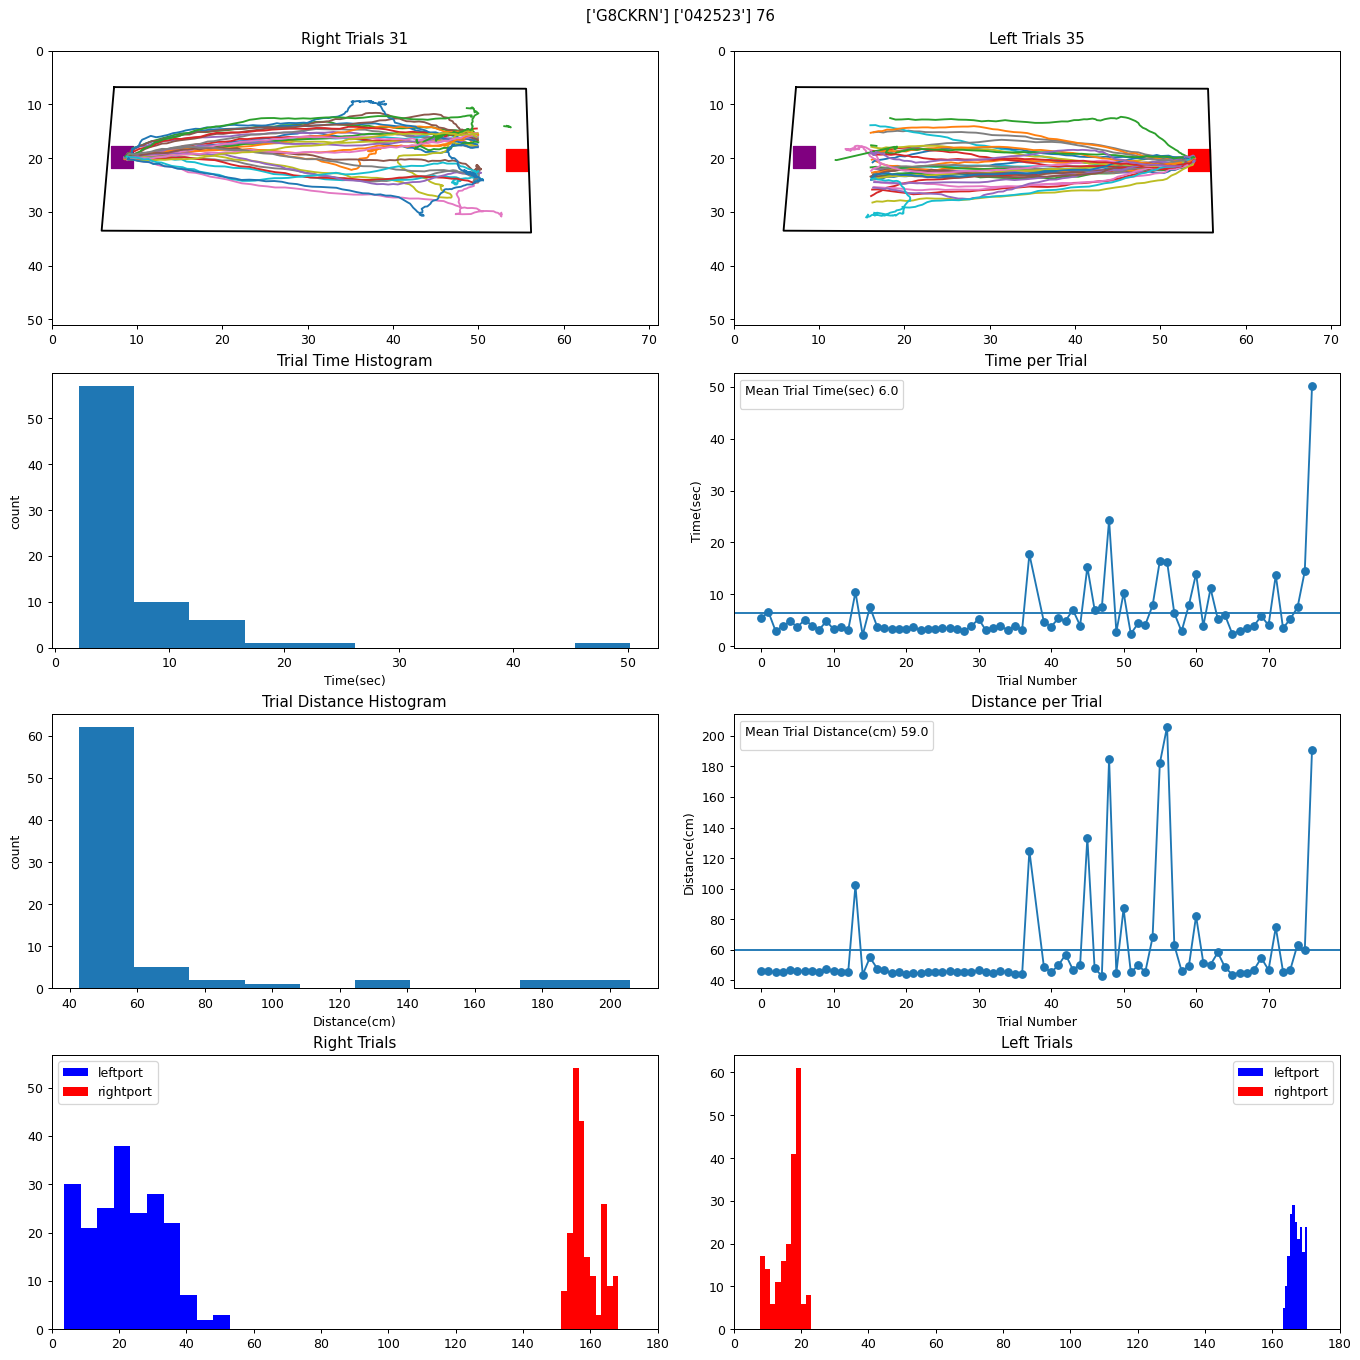

In [434]:
#Summary Figure Single Day 
## set pdf 
savepath = "D:/obstacle_avoidance/recordings"
savepath_session = os.path.join(*[savepath,str(pd.unique(df.date)),str(pd.unique(df.date)),str(pd.unique(df.task))])
pdf = PdfPages(os.path.join(*[savepath,str(pd.unique(df.date)),str(pd.unique(df.date)),str(pd.unique(df.task))]+''))

##Figure
fig = plt.figure(constrained_layout=False, figsize=(15, 15),dpi=90)
spec2 = gridspec.GridSpec(ncols=2, nrows=4, figure=fig)
plt.suptitle(str(pd.unique(df.animal)) + " " + str(pd.unique(df.date) ) + " " + str(len(df)))
ax1 = fig.add_subplot(spec2[0,0])
ax2 = fig.add_subplot(spec2[0,1])
ax3 = fig.add_subplot(spec2[1,0])
ax4 = fig.add_subplot(spec2[1,1])
ax5 = fig.add_subplot(spec2[2,0])
ax6 = fig.add_subplot(spec2[2,1])
ax7 = fig.add_subplot(spec2[3,0])
ax8 = fig.add_subplot(spec2[3,1])


##left and right trajectories

right,left = df[df['odd']=='right'],df[df['odd']=='left']
right = right.loc[right['dist']<70]
left = left.loc[left['dist']<70]
right_nose_x,right_nose_y=right['ts_nose_x_cm'].to_numpy(), right['ts_nose_y_cm'].to_numpy() 
left_nose_x,left_nose_y=left['ts_nose_x_cm'].to_numpy(), left['ts_nose_y_cm'].to_numpy() 



arena_x = pd.unique(df[['mean_arenaTL_x_cm',
'mean_arenaTR_x_cm','mean_arenaBR_x_cm',
'mean_arenaBL_x_cm',
'mean_arenaTL_x_cm']].values.ravel('K'))

arena_y = pd.unique(df[['mean_arenaTL_y_cm',
'mean_arenaTR_y_cm','mean_arenaBR_y_cm',
'mean_arenaBL_y_cm',
'mean_arenaTL_y_cm']].values.ravel('K'))

left_port =  pd.unique(df[['mean_leftportT_x_cm','mean_leftportT_y_cm']].values.ravel('K'))

right_port = pd.unique(df[['mean_rightportT_x_cm','mean_rightportT_y_cm']].values.ravel('K'))


for ind in range(len(right)):
    ax1.plot(right_nose_x[ind],right_nose_y[ind])
ax1.set_ylim([51,0]); ax1.set_xlim([0, 71])
ax1.title.set_text('Right Trials'+' '+ str(len(right)))

ax1.plot([arena_x[0],arena_x[1],arena_x[2],arena_x[3],arena_x[0]],
          [arena_y[0],arena_y[1],arena_y[2],arena_y[3],arena_y[0]],c='k')

ax1.scatter(left_port[0],left_port[1],c='purple',s=300,marker = 's')
ax1.scatter(right_port[0],right_port[1],c='r',s=300,marker = 's')

for ind in range(len(left)):
    ax2.plot(left_nose_x[ind],left_nose_y[ind])
ax2.set_ylim([51,0]); ax2.set_xlim([0, 71])
ax2.title.set_text('Left Trials'+' '+ str(len(left)))
ax2.plot([arena_x[0],arena_x[1],arena_x[2],arena_x[3],arena_x[0]],
          [arena_y[0],arena_y[1],arena_y[2],arena_y[3],arena_y[0]],c='k')

ax2.scatter(left_port[0],left_port[1],c='purple',s=300,marker = 's')
ax2.scatter(right_port[0],right_port[1],c='r',s=300,marker = 's')



## Trial time 
#histogram
ax3.hist(df['time'])
ax3.set_xlabel('Time(sec)')
ax3.set_ylabel('count')
ax3.title.set_text('Trial Time Histogram')

ax4.plot(df.index,df['time'],'-o')
ax4.set_xlabel('Trial Number')
ax4.set_ylabel('Time(sec)')
ax4.axline((0,df['time'].mean()),slope=0)
ax4.legend(title ='Mean Trial Time(sec) ' + str(np.round(df['time'].mean())))
ax4.title.set_text('Time per Trial')
## Trial distance

ax5.hist(df['dist'])
ax5.set_xlabel('Distance(cm)')
ax5.set_ylabel('count')
ax5.title.set_text('Trial Distance Histogram')

ax6.plot(df.index,df['dist'],'-o')
ax6.set_xlabel('Trial Number')
ax6.set_ylabel('Distance(cm)')
ax6.axline((0,df['dist'].mean()),slope=0)
ax6.legend(title ='Mean Trial Distance(cm) ' + str(np.round(df['dist'].mean())))
ax6.title.set_text('Distance per Trial')

## angle to port

#right starting 
ax7.hist(np.mean(right['resample_angle_to_leftport']),color='b',label='leftport')
ax7.hist(np.mean(right['resample_angle_to_rightport']),color = 'r',label='rightport')
ax7.legend()
ax7.set_xlim(0,180)
ax7.title.set_text('Right Trials')

#left starting 
ax8.hist(np.mean(left['resample_angle_to_leftport']),color='b',label='leftport')
ax8.hist(np.mean(left['resample_angle_to_rightport']),color = 'r',label='rightport')
ax8.legend()
ax8.set_xlim(0,180)
ax8.title.set_text('Left Trials')













In [551]:
df.at[1,'resample_angle_to_leftport']

KeyError: 'resample_angle_to_leftport'

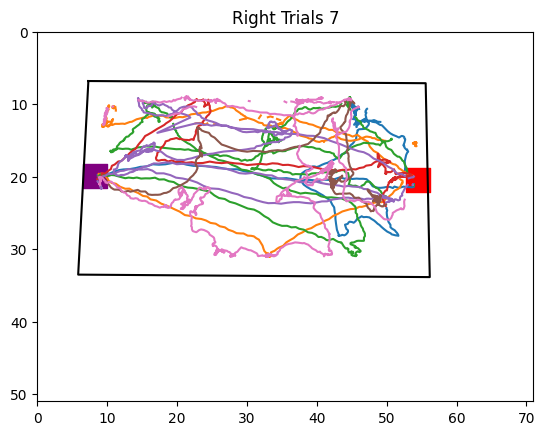

In [77]:
test = right.loc[right['dist']>80]
for ind,row in test.iterrows():
    plt.plot(row['ts_nose_x_cm'],row['ts_nose_y_cm'],)
    plt.ylim([51,0]); plt.xlim([0, 71])
    plt.title('Right Trials'+' '+ str(len(test)))

plt.plot([arena_x[0],arena_x[1],arena_x[2],arena_x[3],arena_x[0]],
          [arena_y[0],arena_y[1],arena_y[2],arena_y[3],arena_y[0]],c='k')

plt.scatter(left_port[0],left_port[1],c='purple',s=300,marker = 's')
plt.scatter(right_port[0],right_port[1],c='r',s=300,marker = 's')


In [73]:
test = right.loc[right['dist']>80]

In [87]:
test.columns.to_numpy()

array(['first_poke', 'second_poke', 'trial_timestamps', 'trial_vidframes',
       'nose_x', 'nose_y', 'nose_likelihood', 'leftear_x', 'leftear_y',
       'leftear_likelihood', 'rightear_x', 'rightear_y',
       'rightear_likelihood', 'spine_x', 'spine_y', 'spine_likelihood',
       'midspine_x', 'midspine_y', 'midspine_likelihood', 'tailbase_x',
       'tailbase_y', 'tailbase_likelihood', 'midtail_x', 'midtail_y',
       'midtail_likelihood', 'tailend_x', 'tailend_y',
       'tailend_likelihood', 'arenaTL_x', 'arenaTL_y',
       'arenaTL_likelihood', 'arenaTR_x', 'arenaTR_y',
       'arenaTR_likelihood', 'arenaBL_x', 'arenaBL_y',
       'arenaBL_likelihood', 'arenaBR_x', 'arenaBR_y',
       'arenaBR_likelihood', 'leftportT_x', 'leftportT_y',
       'leftportT_likelihood', 'leftportB_x', 'leftportB_y',
       'leftportB_likelihood', 'rightportT_x', 'rightportT_y',
       'rightportT_likelihood', 'rightportB_x', 'rightportB_y',
       'rightportB_likelihood', 'len', 'animal', 'date', 'ta

In [18]:
test = df.at[4,'nose_x_cm'].astype(float)
dist = np.nansum(np.abs(np.diff(test)))

In [208]:
df.index

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
            34, 35, 36, 37, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
            52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
            69, 70, 71, 72, 73, 74, 75, 76],
           dtype='int64')

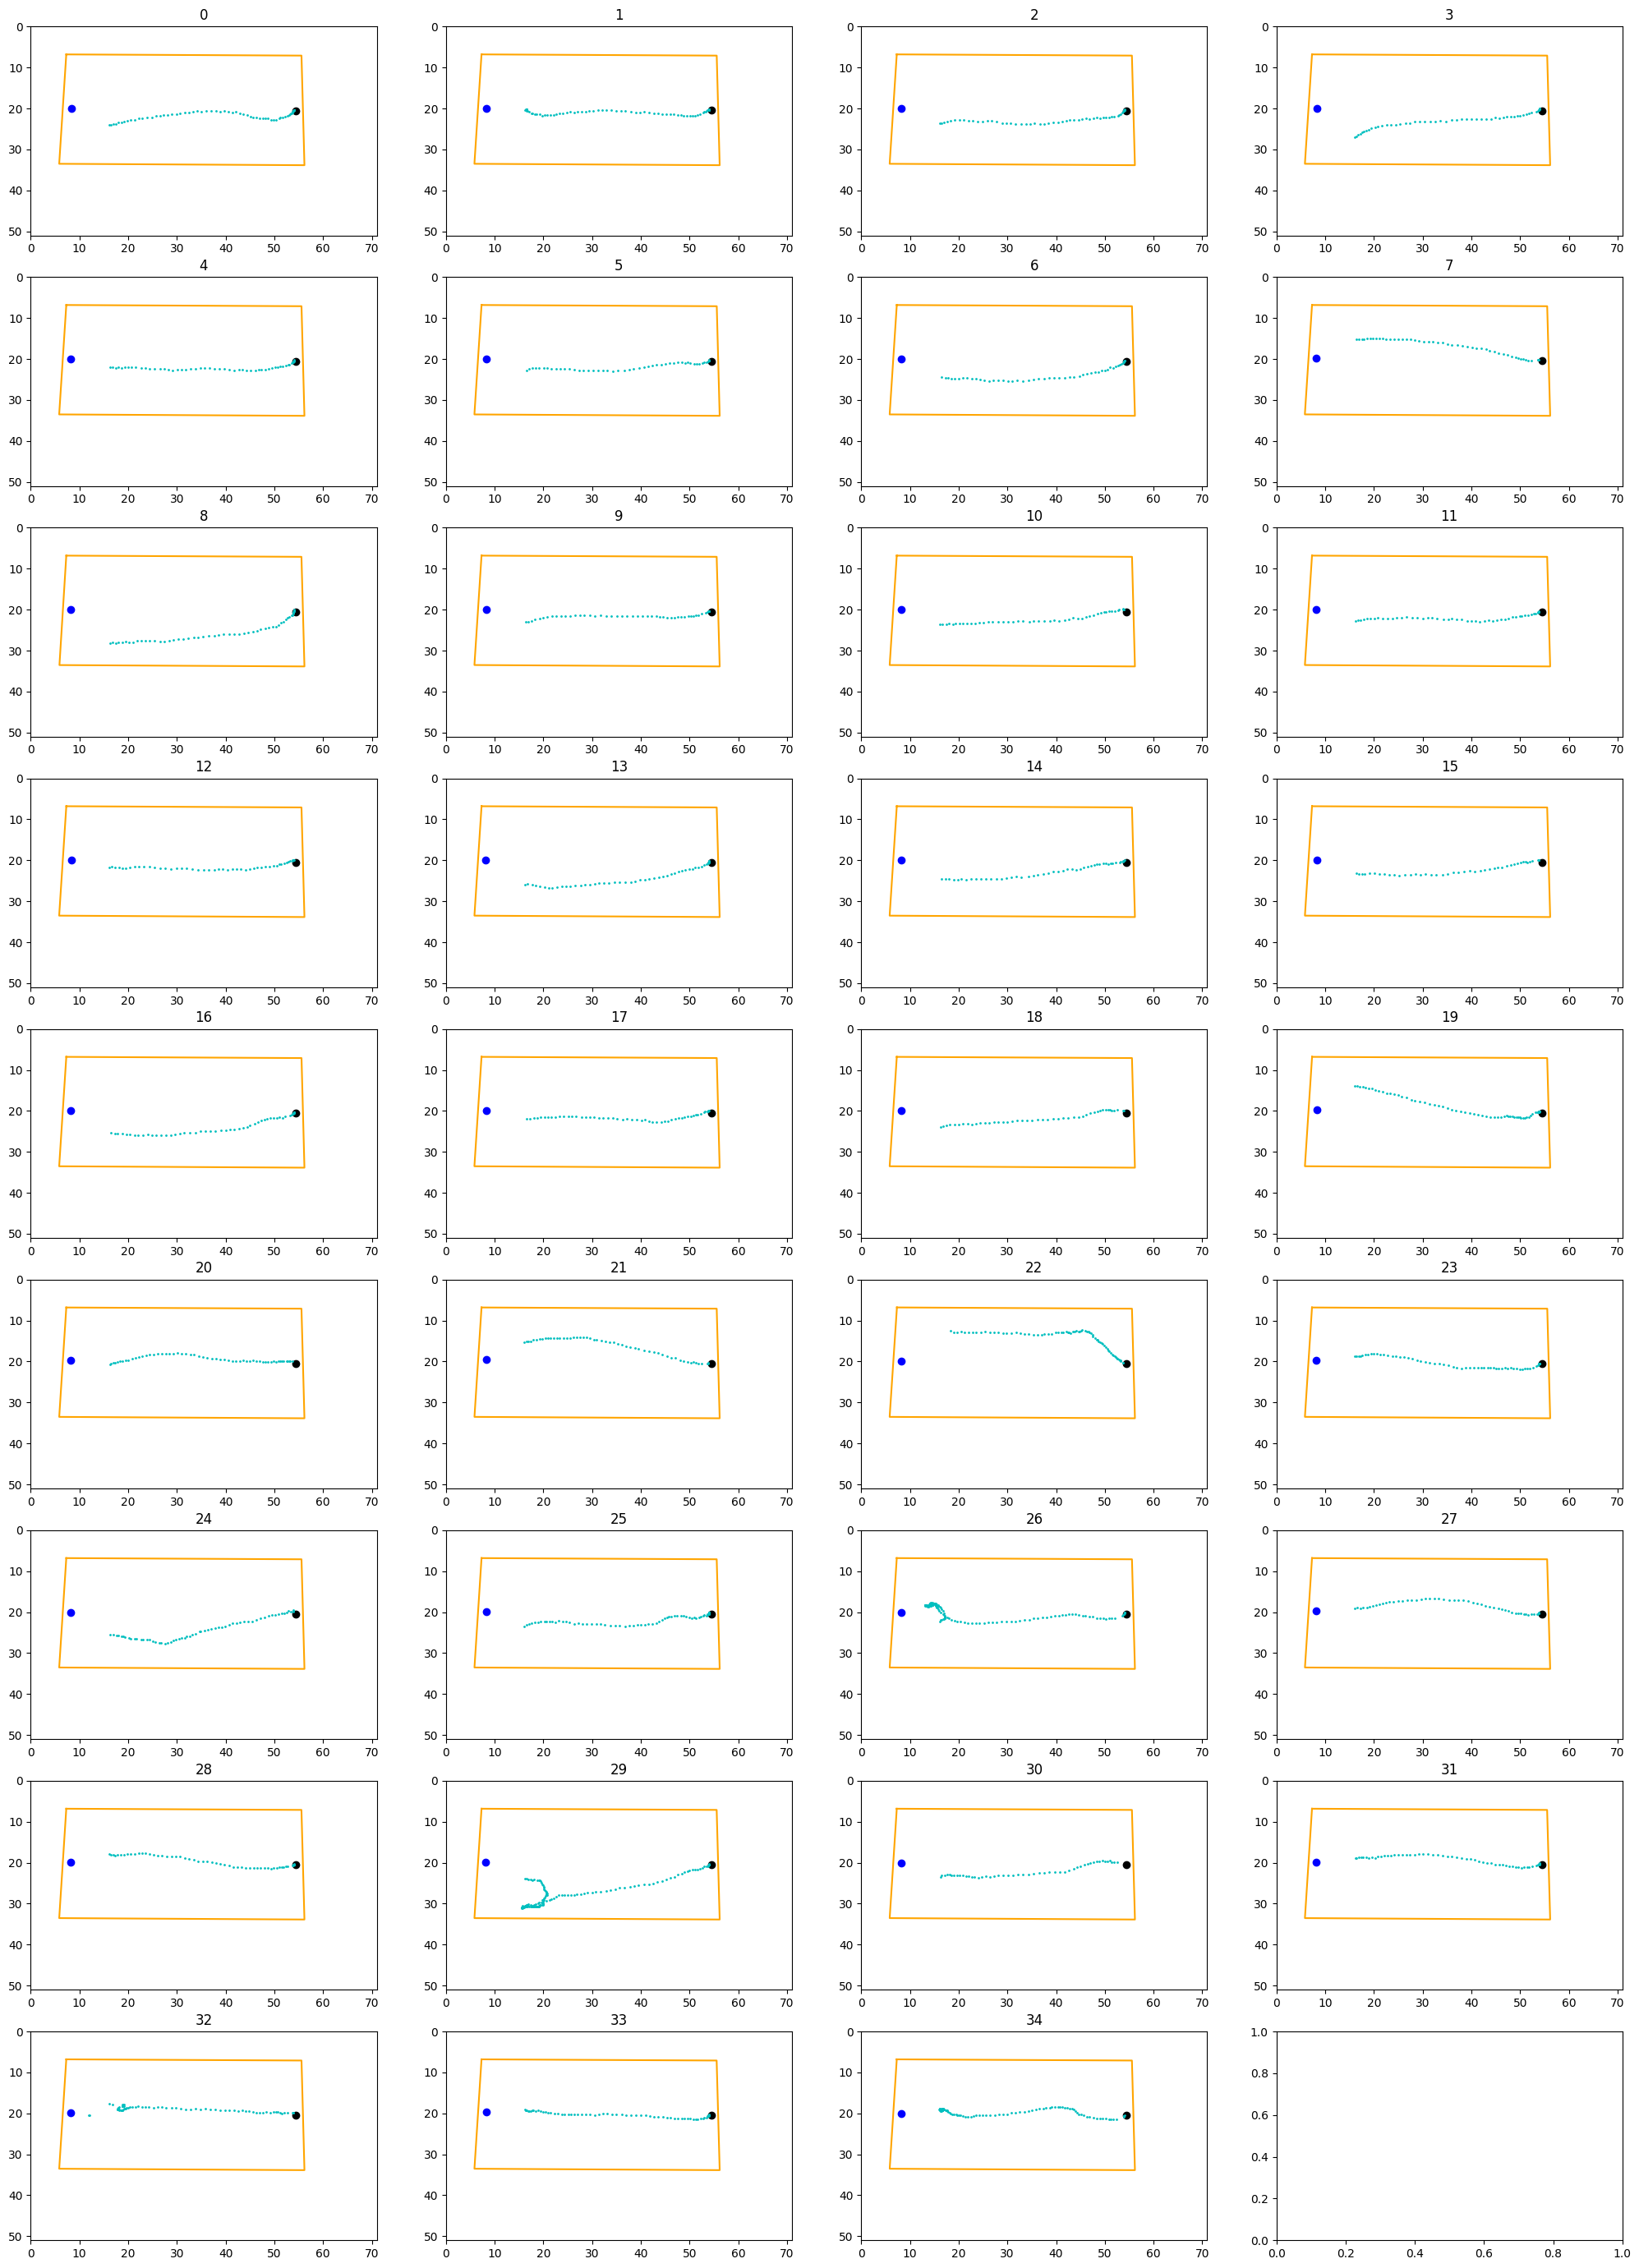

In [207]:
test = left.reset_index()
y = nearestX_roundup(len(test),4)
fig, ax = plt.subplots(int((y/4)),4, figsize=(25,len(test)),dpi = 100)

for ind,row in test.iterrows():
    plt.subplot(int((y/4)),4,ind+1)
    plt.ylim([51,0]); plt.xlim([0, 71])
    plt.gca().set_title(str(ind))
    plt.plot([row['arenaTL_x_cm'], row['arenaTR_x_cm'], row['arenaBR_x_cm'], row['arenaBL_x_cm'],row['arenaTL_x_cm']],
                [row['arenaTL_y_cm'], row['arenaTR_y_cm'], row['arenaBR_y_cm'], row['arenaBL_y_cm'],row['arenaTL_y_cm']],color='orange')
    plt.scatter(row['leftportT_x_cm'],row['leftportT_y_cm'],color='blue')
    plt.scatter(row['rightportT_x_cm'],row['rightportT_y_cm'],color='black')
    plt.scatter(row['ts_nose_x_cm'],row['ts_nose_y_cm'], color = 'c',s=1)

In [69]:
right.index

Int64Index([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
            35, 37, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66, 68,
            70, 72, 74, 76],
           dtype='int64')

In [71]:
right.at[76,'dist']

190.95512880877328

In [104]:
df.columns.to_numpy()

array(['first_poke', 'second_poke', 'trial_timestamps', 'trial_vidframes',
       'nose_x', 'nose_y', 'nose_likelihood', 'leftear_x', 'leftear_y',
       'leftear_likelihood', 'rightear_x', 'rightear_y',
       'rightear_likelihood', 'spine_x', 'spine_y', 'spine_likelihood',
       'midspine_x', 'midspine_y', 'midspine_likelihood', 'tailbase_x',
       'tailbase_y', 'tailbase_likelihood', 'midtail_x', 'midtail_y',
       'midtail_likelihood', 'tailend_x', 'tailend_y',
       'tailend_likelihood', 'arenaTL_x', 'arenaTL_y',
       'arenaTL_likelihood', 'arenaTR_x', 'arenaTR_y',
       'arenaTR_likelihood', 'arenaBL_x', 'arenaBL_y',
       'arenaBL_likelihood', 'arenaBR_x', 'arenaBR_y',
       'arenaBR_likelihood', 'leftportT_x', 'leftportT_y',
       'leftportT_likelihood', 'leftportB_x', 'leftportB_y',
       'leftportB_likelihood', 'rightportT_x', 'rightportT_y',
       'rightportT_likelihood', 'rightportB_x', 'rightportB_y',
       'rightportB_likelihood', 'len', 'animal', 'date', 'ta

In [136]:
def shift_to_origin(point):
    return (-point[0], -point[1])

def shift_points(points, x_shift, y_shift):
    """
    Shifts a list of 2D points by a given x and y value.

    Args:
        points (list): A list of 2D points in the format [(x1, y1), (x2, y2), ...]
        x_shift (float): The amount to shift the points in the x direction.
        y_shift (float): The amount to shift the points in the y direction.

    Returns:
        list: A list of shifted points in the same format as the input points.
    """
    shifted_points = []
    for point in points:
        x = point[0] + x_shift
        y = point[1] + y_shift
        shifted_points.append((x, y))
    return shifted_points

import math

def angle_between_vectors(center, vector1, vector2):
    # Calculate the vectors relative to the center
    v1 = [vector1[0] - center[0], vector1[1] - center[1]]
    v2 = [vector2[0] - center[0], vector2[1] - center[1]]
    
    # Calculate the dot product of the vectors
    dot_product = v1[0]*v2[0] + v1[1]*v2[1]
    
    # Calculate the magnitudes of the vectors
    magnitude_v1 = math.sqrt(v1[0]**2 + v1[1]**2)
    magnitude_v2 = math.sqrt(v2[0]**2 + v2[1]**2)
    
    # Calculate the cosine of the angle between the vectors
    cos_angle = dot_product / (magnitude_v1 * magnitude_v2)
    
    # Calculate the angle in radians
    angle = math.acos(cos_angle)
    
    # Convert the angle from radians to degrees
    angle_degrees = math.degrees(angle)
    
    return angle_degrees


In [116]:
test['ts_rightear_y_cm'].astype(float)[0]

23.192040332213864

In [118]:
np.mean([test['ts_rightear_x_cm'].astype(float)[0],test['ts_leftear_x_cm'].astype(float)[0]])

14.832144227407618

In [181]:
test = df.iloc[4]

center = [np.mean([test['ts_rightear_x_cm'][0],test['ts_leftear_x_cm'][0]]),np.mean([test['ts_rightear_y_cm'][0],test['ts_leftear_y_cm'][0]])]

vector1 = [test['ts_nose_x_cm'][0],test['ts_nose_y_cm'][0]]

vector2 = right_port

shift_value = shift_to_origin(center)

shifted_points = shift_points([vector1,vector2],shift_value[0],shift_value[1])

shifted_vector1,shifted_vector2 =  shifted_points[0],shifted_points[1]

print(vector1,vector2,shifted_vector1,shifted_vector2,shift_value)

[16.14271578206121, 23.623341029494405] [54.4737112  20.45567013] (1.3105715546535919, 0.8445691568298805) (39.641566972759854, -2.3231017421328914) (-14.832144227407618, -22.778771872664525)


In [199]:
print(angle_between_vectors([0,0], shifted_vector1, shifted_vector2))

print(angle_between_vectors(center, vector1, vector2))

print(center, shifted_vector1, shifted_vector2)

print(center, vector1, vector2)



36.15272014480458
32.79887021366843
(11.227239836589526, 20.455670130531633) (1.3105715546535919, 0.8445691568298805) (39.641566972759854, -2.3231017421328914)
(11.227239836589526, 20.455670130531633) [16.14271578206121, 23.623341029494405] [54.4737112  20.45567013]


In [242]:

import math
 
def getAngle(a, b, c):
    ang = math.degrees(math.atan2(c[1]-b[1], c[0]-b[0]) - math.atan2(a[1]-b[1], a[0]-b[0]))
    return ang
    #return ang + 360 if ang < 0 else ang
 
print(getAngle((5, 0), (0, 0), (0, 5)))

90.0


In [201]:
print(getAngle(vector1, center, vector2))

327.2011297863316


In [ ]:
center1 = [test['mean_leftport_x_cm'],test['mean_rightport_y_cm']]

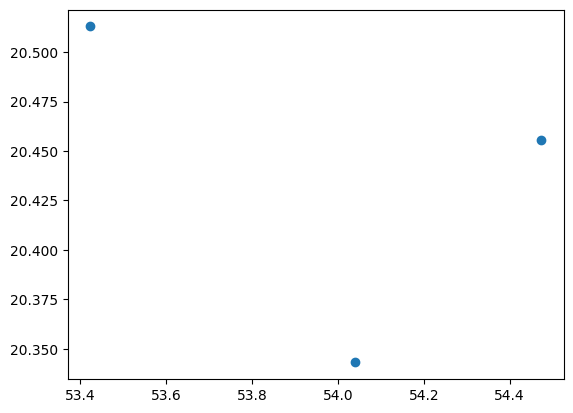

In [159]:
plt.scatter([vector1[0], center[0], vector2[0]],[vector1[1], center[1], vector2[1]])

In [151]:
test['ts_rightear_x_cm']

array([14.409519258101744, 14.805820261390107, 15.38625093227591,
       15.861737032181951, 16.632750261327168, 17.38670154848367,
       18.258130090454884, 19.29883708179268, 20.235378403726774,
       21.1473522250948, 22.073794476360813, 23.08413763114277,
       24.068128958731087, 25.08826471124373, 25.98677552776529,
       27.182979377130973, 28.2058237205053, 29.146848269084774,
       30.04065418090742, 31.006225637009734, 31.980085187331913,
       32.92633067804638, 33.93010101797347, 34.8898773494415,
       35.909799903389, 36.914008754001216, 37.933420115934574,
       38.82492929776002, 39.969754715637656, 40.604875663904096,
       41.333430883343645, 42.12651500940291, 42.93517716698327,
       43.749634449197934, 44.57687395447719, 45.37464360354762,
       46.16245106511964, 47.0335028755354, 47.595625119639706,
       48.31034423674379, 48.81502400380836, 49.47559553078853,
       50.09285867651344, 50.69306593702704, 51.18989612055688,
       51.409883121829, 51.

In [266]:
test = df.iloc[4]

center = [np.mean([test['ts_rightear_x_cm'][-1],test['ts_leftear_x_cm'][-1]]),np.mean([test['ts_rightear_y_cm'][-1],test['ts_leftear_y_cm'][-1]])]

vector1 = [test['ts_nose_x_cm'][-1],test['ts_nose_y_cm'][-1]]

vector2 = right_port

shift_value = shift_to_origin(center)

shifted_points = shift_points([vector1,vector2],shift_value[0],shift_value[1])

shifted_vector1,shifted_vector2 =  shifted_points[0],shifted_points[1]

print(vector1,vector2,shifted_vector1,shifted_vector2,shift_value)

[54.04046269035464, 20.343099401475303] [54.4737112  20.45567013] (0.6171105149339482, -0.1698247706897611) (1.0503590247467827, -0.057254041633431285) (-53.42335217542069, -20.512924172165064)


In [267]:
print(angle_between_vectors([0,0], shifted_vector1, shifted_vector2))

print(angle_between_vectors(center, vector1, vector2))

print(center, shifted_vector1, shifted_vector2)

print(center, vector1, vector2)


12.26650610730322
12.26650610730322
[53.42335217542069, 20.512924172165064] (0.6171105149339482, -0.1698247706897611) (1.0503590247467827, -0.057254041633431285)
[53.42335217542069, 20.512924172165064] [54.04046269035464, 20.343099401475303] [54.4737112  20.45567013]


In [138]:
shift_value

(-14.832144227407618, -22.778771872664525)

In [127]:
center

[14.832144227407618, 22.778771872664525]

In [126]:
shift_to_origin(center)

(-14.832144227407618, -22.778771872664525)

In [129]:
shifted_points = shift_points([vector1,vector2],center)

In [133]:
shifted_points

[(1.3105715546535919, 0.8445691568298805),
 (39.641566972759854, -2.3231017421328914)]

In [132]:
shifted_points[0][0]

1.3105715546535919

In [122]:
print(angle_between_vectors(center, vector1, vector2))
print(center, vector1, vector2)

36.15272014480458
[14.832144227407618, 22.778771872664525] [16.14271578206121, 23.623341029494405] [54.4737112  20.45567013]


In [276]:
import math

def angle_between_vectors(center, vector1, vector2):
    # Calculate the vectors relative to the center
    v1 = [vector1[0] - center[0], vector1[1] - center[1]]
    v2 = [vector2[0] - center[0], vector2[1] - center[1]]

    
    # Calculate the dot product of the vectors
    dot_product = v1[0]*v2[0] + v1[1]*v2[1]
    
    # Calculate the magnitudes of the vectors
    magnitude_v1 = math.sqrt(v1[0]**2 + v1[1]**2)
    magnitude_v2 = math.sqrt(v2[0]**2 + v2[1]**2)
    
    # Calculate the cosine of the angle between the vectors
    cos_angle = dot_product / (magnitude_v1 * magnitude_v2)
    
    # Calculate the angle in radians
    angle = math.acos(cos_angle)

    
    
    # Convert the angle from radians to degrees
    angle_degrees = math.degrees(angle)
    
    return angle_degrees

def calculate_angle(p1, p2, p3):
    """
    Calculates the angle made by connecting three points.
    Assumes that p1 is the vertex of the angle.
    """
    x1, y1 = p1
    x2, y2 = p2
    x3, y3 = p3
    
    # Calculate the vectors
    v1 = (x2 - x1, y2 - y1)
    v2 = (x3 - x1, y3 - y1)
    
    # Calculate the dot product
    dot_product = v1[0] * v2[0] + v1[1] * v2[1]
    
    # Calculate the magnitudes of the vectors
    v1_mag = math.sqrt(v1[0] ** 2 + v1[1] ** 2)
    v2_mag = math.sqrt(v2[0] ** 2 + v2[1] ** 2)
    
    # Calculate the angle (in radians) using the dot product and vector magnitudes
    angle = math.acos(dot_product / (v1_mag * v2_mag))
    
    # Convert the angle to degrees and return it
    return math.degrees(angle)


In [278]:
test = df.iloc[4]

center = [np.mean([test['ts_rightear_x_cm'][0],test['ts_leftear_x_cm'][0]]),np.mean([test['ts_rightear_y_cm'][0],test['ts_leftear_y_cm'][0]])]

vector1 = [test['ts_nose_x_cm'][0],test['ts_nose_y_cm'][0]]

vector2 = right_port

angle = calculate_angle(center, vector1, vector2)
angle_between = angle_between_vectors(center, vector1, vector2)

print(angle,angle_between)


#angle, v1, v2 = angle_between_vectors(center, vector1, vector2)
#print(vector1,vector2,center,angle, v1, v2 )

36.15272014480458 36.15272014480458


In [287]:
test = df.iloc[4]
angle_to_rightport = []
angle_to_leftport = []
for ind in range(len(test['ts_nose_x_cm'])): 
    center = [np.mean([test['ts_rightear_x_cm'][ind],test['ts_leftear_x_cm'][ind]]),np.mean([test['ts_rightear_y_cm'][ind],test['ts_leftear_y_cm'][ind]])]
    vector1 = [test['ts_nose_x_cm'][ind],test['ts_nose_y_cm'][ind]]
    rightport = [test['mean_rightportT_x_cm'],test['mean_rightportT_y_cm']]
    leftport = [test['mean_leftportT_x_cm'],test['mean_leftportT_y_cm']]

    angleright = calculate_angle(center, vector1, rightport)
    angleleft = calculate_angle(center, vector1, leftport)
    angle_to_rightport.append(angleright)
    angle_to_leftport.append(angleleft)
test['angle_to_rightport'] = np.array(angle_to_rightport).astype(object)
test['angle_to_leftport'] = np.array(angle_to_leftport).astype(object)




In [295]:
test = df.iloc[33]
angle_to_rightport = []
angle_to_leftport = []
for ind in range(len(test['ts_nose_x_cm'])): 
    center = [np.mean([test['ts_rightear_x_cm'][ind],test['ts_leftear_x_cm'][ind]]),np.mean([test['ts_rightear_y_cm'][ind],test['ts_leftear_y_cm'][ind]])]
    vector1 = [test['ts_nose_x_cm'][ind],test['ts_nose_y_cm'][ind]]
    rightport = [test['mean_rightportT_x_cm'],test['mean_rightportT_y_cm']]
    leftport = [test['mean_leftportT_x_cm'],test['mean_leftportT_y_cm']]

    angleright = calculate_angle(center, vector1, rightport)
    angleleft = calculate_angle(center, vector1, leftport)
    angle_to_rightport.append(angleright)
    angle_to_leftport.append(angleleft)
test['angle_to_rightport'] = np.array(angle_to_rightport).astype(object)
test['angle_to_leftport'] = np.array(angle_to_leftport).astype(object)

In [324]:
## calculate the mouses heading angle relative to each port 

def get_angle_to_ports(df):

    for ind,row in df.iterrows():
        angle_to_rightport = []
        angle_to_leftport = []
        rightport = [row['mean_rightportT_x_cm'],row['mean_rightportT_y_cm']]
        leftport = [row['mean_leftportT_x_cm'],row['mean_leftportT_y_cm']]
        for indx in range(len(row['ts_nose_x_cm'])):
            center = [np.mean([row['ts_rightear_x_cm'][indx],row['ts_leftear_x_cm'][indx]]),np.mean([row['ts_rightear_y_cm'][indx],row['ts_leftear_y_cm'][indx]])]
            nose_points = [row['ts_nose_x_cm'][indx],row['ts_nose_y_cm'][indx]]
            angleright = calculate_angle(center, nose_points, rightport)
            angleleft = calculate_angle(center, nose_points, leftport)
            angle_to_rightport.append(angleright)
            angle_to_leftport.append(angleleft)
        df.at[ind,'angle_to_rightport'] = np.array(angle_to_rightport).astype(object)
        df.at[ind,'angle_to_leftport'] = np.array(angle_to_leftport).astype(object)


        



In [503]:
for ind,row in df1.iterrows():
        angle_to_rightport = []
        angle_to_leftport = []
        rightport = [row['mean_rightportT_x_cm'],row['mean_rightportT_y_cm']]
        leftport = [row['mean_leftportT_x_cm'],row['mean_leftportT_y_cm']]
        for indx in range(len(row['ts_nose_x_cm'])):
            center = [np.mean([row['ts_rightear_x_cm'][indx],row['ts_leftear_x_cm'][indx]]),np.mean([row['ts_rightear_y_cm'][indx],row['ts_leftear_y_cm'][indx]])]
            nose_points = [row['ts_nose_x_cm'][indx],row['ts_nose_y_cm'][indx]]
            angleright = calculate_angle(center, nose_points, rightport)
            angleleft = calculate_angle(center, nose_points, leftport)
            angle_to_rightport.append(angleright)
            angle_to_leftport.append(angleleft)
        df1.at[ind,'angle_to_rightport'] = np.array(angle_to_rightport).astype(object)
        df1.at[ind,'angle_to_leftport'] = np.array(angle_to_leftport).astype(object)


In [362]:
len_list = []
nan_list = []
for ind,row in right.iterrows():
    length = len(row['angle_to_rightport'])
    nan = np.count_nonzero(~np.isnan(row['angle_to_rightport'].astype(float)))
    len_list.append(length)
    nan_list.append(nan)

np.mean(len_list)
print(nan_list)

[80, 75, 76, 66, 63, 76, 112, 63, 57, 55, 64, 57, 54, 62, 62, 81, 63, 66, 128, 129, 278, 134, 222, 57, 84, 187, 67, 77, 64, 90, 254]


In [358]:
len(nan_list)

38

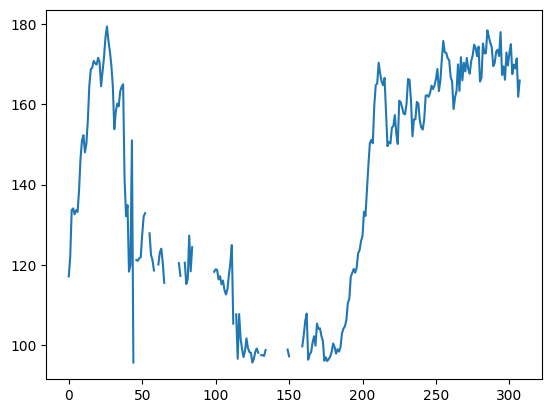

In [363]:
from scipy import signal
resample = signal.resample(angle_to_rightport,100)
plt.plot(right.at[74,'angle_to_rightport'])

(0.0, 71.0)

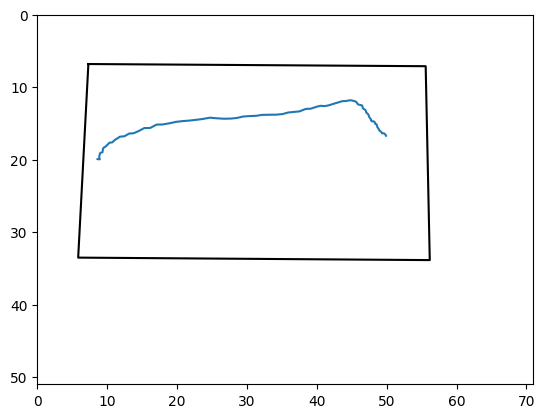

In [390]:
plt.plot(right.at[33,'ts_nose_x_cm'],right.at[33,'ts_nose_y_cm'])
plt.plot([arena_x[0],arena_x[1],arena_x[2],arena_x[3],arena_x[0]],
          [arena_y[0],arena_y[1],arena_y[2],arena_y[3],arena_y[0]],c='k')
plt.ylim([51,0]); plt.xlim([0, 71])


In [392]:
right.at[33,'angle_to_leftport']

array([39.00023486001986, 41.57856957891406, 40.6045744903259,
       34.41668095280674, 37.560519417959775, 38.64195577158504,
       43.30964265664961, 46.37520872368942, 53.93411653357871,
       50.635849538250895, 50.9278697368939, 48.536021862923896,
       44.986564023699344, 47.08940877312672, 53.703439506204035,
       55.700105641607514, 57.548534227258315, 63.07872999217802,
       57.200865805077015, 59.53283284953471, 55.841619666907384,
       61.793679432530965, 52.07041081857521, 53.37511007239224,
       49.64900344779178, 49.920850545787935, 40.750386067947325,
       37.33681102865354, 30.52651728286106, 26.107496221914513,
       22.563526111035177, 22.186381365938402, 24.845059659319567,
       22.82475252494845, 17.864488318137457, 18.193584165739026,
       7.419234525287484, 11.12090703896707, 11.954643546824109,
       7.149356476294577, 8.9391891588879, 10.361545078912268,
       10.932578797182154, 6.926063235647985, 9.305129815314439,
       13.5919895714983

(array([16., 23.,  8.,  5.,  1.,  4.,  5.,  7.,  7.,  5.]),
 array([ 2.31409054,  8.39055449, 14.46701843, 20.54348238, 26.61994632,
        32.69641027, 38.77287421, 44.84933816, 50.9258021 , 57.00226605,
        63.07872999]),
 <BarContainer object of 10 artists>)

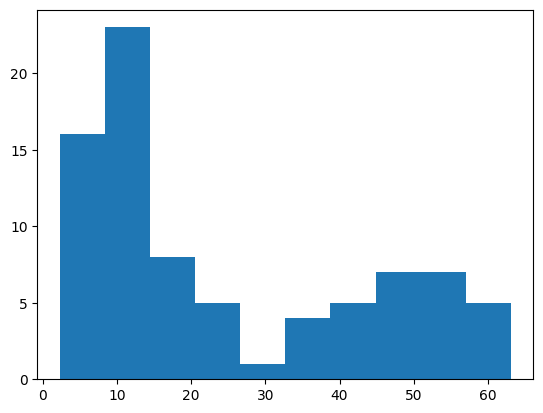

In [391]:
plt.hist(right.at[33,'angle_to_leftport'])

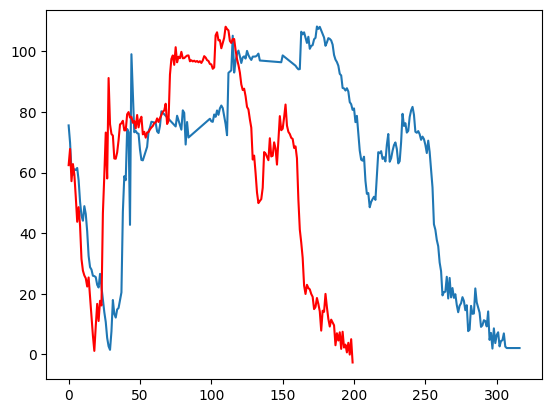

In [393]:
interp = pd.Series(right.at[74,'angle_to_leftport'].astype(float)).interpolate().values
resample = signal.resample(interp,200)
plt.plot(interp)

plt.plot(resample,c='r')

In [426]:
# resample port angle 
right_left = ['angle_to_leftport','angle_to_rightport','ts_nose_x_cm','ts_nose_y_cm']
for ind,row in left.iterrows():
    for direction in right_left:
        interp = pd.Series(row[direction].astype(float)).interpolate().values
        resample = signal.resample(interp,200)
        left.at[ind,'resample_'+ direction] = resample.astype(object)

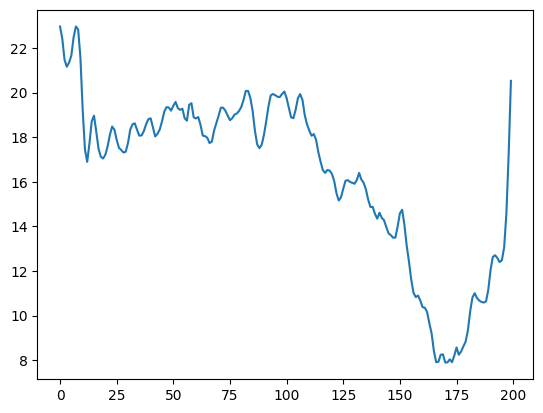

In [421]:
plt.plot(np.mean(left['resample_angle_to_rightport']))
#plt.plot(np.mean(left['resample_ts_nose_x_cm']))

In [419]:
np.mean(left['resample_ts_nose_x_cm'])

array([16.29008756, 11.70384339, 12.74742973, 15.68427525, 18.35174755,
       19.22211872, 18.30510154, 16.93707853, 16.26841799, 16.51164933,
       17.53222018, 18.52131841, 19.0355725 , 18.86993894, 18.51298916,
       18.3840026 , 18.58682518, 18.91558126, 19.3501257 , 19.62005196,
       19.8618623 , 20.02548159, 20.03009077, 19.99356547, 20.14843045,
       20.41015783, 20.81909087, 21.16021645, 21.34285551, 21.38911914,
       21.44005527, 21.5776801 , 21.8776173 , 22.219253  , 22.53925816,
       22.71854243, 22.83431601, 22.98925513, 23.17788879, 23.41407858,
       23.68001513, 23.89745245, 24.12580658, 24.38664433, 24.60863959,
       24.83982455, 25.05366157, 25.24088838, 25.44238086, 25.70869458,
       26.00628394, 26.30686064, 26.52350655, 26.68056145, 26.81045356,
       27.04020649, 27.36107779, 27.68032954, 27.95726675, 28.21139312,
       28.35976737, 28.52307481, 28.74748369, 29.02644173, 29.33919062,
       29.65673938, 29.875921  , 30.06024742, 30.24235323, 30.48

(0.0, 180.0)

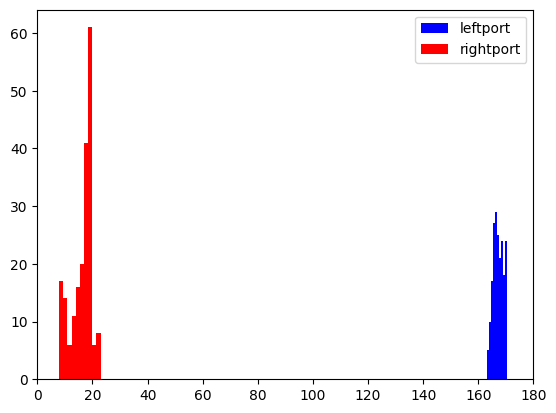

In [428]:
plt.hist(np.mean(left['resample_angle_to_leftport']),color='b',label='leftport')
plt.hist(np.mean(left['resample_angle_to_rightport']),color = 'r',label='rightport')
plt.legend()
plt.xlim(0,180)

In [397]:
# resample port angle 
right_left = ['angle_to_leftport','angle_to_rightport']
for ind,row in right.iterrows():
    for direction in right_left:
        interp = pd.Series(row[direction].astype(float)).interpolate().values
        resample = signal.resample(interp,200)
        right.at[ind,'resample_'+ direction] = resample.astype(object)

(0.0, 180.0)

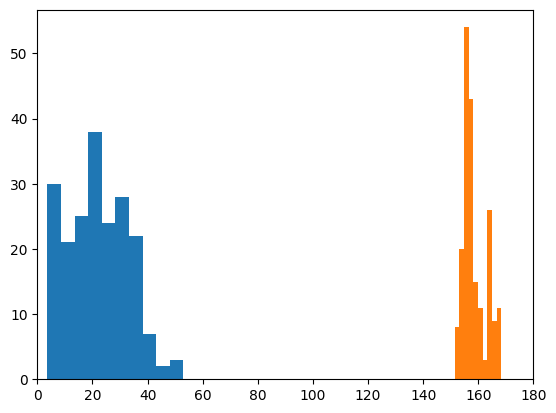

In [403]:
plt.hist(np.mean(right['resample_angle_to_leftport']))
plt.hist(np.mean(right['resample_angle_to_rightport']))
plt.xlim(0,180)

In [398]:
right.head()

,first_poke,second_poke,trial_timestamps,trial_vidframes,nose_x,nose_y,nose_likelihood,leftear_x,leftear_y,leftear_likelihood,...,ts_tailbase_y,ts_tailbase_x_cm,ts_tailbase_y_cm,time,dist,head_angle,angle_to_rightport,angle_to_leftport,resample_angle_to_rightport,resample_angle_to_leftport
1,55399.692710,55406.275622,"[55399.697408, 55399.714227, 55399.73166, 5539...","[[401, 402, 403, 404, 405, 406, 407, 408, 409,...","[680.404052734375, 680.4052734375, 680.1578369...","[256.7088317871094, 255.7943572998047, 256.259...","[0.881475031375885, 0.9045121073722839, 0.8687...","[671.7708740234375, 672.01953125, 672.78625488...","[250.4983673095703, 249.6996612548828, 250.191...","[0.9996205568313599, 0.9996342658996582, 0.999...",...,"[277.20843505859375, 278.1985778808594, 277.62...","[49.43925486627584, 49.52807145034486, 49.5223...","[22.006854972328426, 22.085459829669386, 22.03...",6.566667,45.860957,"[-2.1105935034983156, -2.149252968961806, -2.1...","[141.70944266183722, 145.33291421481908, 149.0...","[60.284681725774746, 58.24885519463886, 55.883...","[141.70944266183722, 139.28256244118236, 143.6...","[60.28468172577475, 68.05877194962575, 61.1028..."
3,55409.147072,55413.079526,"[55409.150656, 55409.167513, 55409.184678, 554...","[[968, 969, 970, 971, 972, 973, 974, 975, 976,...","[680.7318115234375, nan, nan, nan, nan, nan, n...","[254.07810974121094, nan, nan, nan, nan, nan, ...","[0.829044759273529, 0.7120593786239624, 0.6254...","[672.8353271484375, 674.31982421875, 674.53082...","[249.12271118164062, 249.3397674560547, 249.56...","[0.9986060261726379, 0.9988943934440613, 0.998...",...,"[264.46234130859375, 264.9588623046875, 264.91...","[50.5022096124283, 50.67654304822861, 50.89951...","[20.994975818793066, 21.034393326234504, 21.03...",3.916667,45.382850,"[-2.7128356827909617, -2.648423332926663, -2.7...","[158.7715871439503, 164.14251588187543, 158.78...","[28.060047892720775, 31.621360302480916, 25.22...","[158.77158714395057, 159.74673979799041, 163.0...","[28.060047892720792, 33.113271462109225, 32.68..."
5,55417.855808,55421.571468,"[55417.870566, 55417.887283, 55417.904793, 554...","[[1491, 1492, 1493, 1494, 1495, 1496, 1497, 14...","[680.8028564453125, 680.7640380859375, 682.088...","[256.4054870605469, 256.0868835449219, 256.972...","[0.9027332663536072, 0.9151875376701355, 0.923...","[673.3760986328125, 673.1444091796875, 673.830...","[249.85816955566406, 251.35882568359375, 251.8...","[0.9992859959602356, 0.9993466734886169, 0.999...",...,"[273.2482604980469, 271.75006103515625, 270.03...","[50.409691126000915, 50.61167253936248, 50.746...","[21.692467038207166, 21.573528888679046, 21.43...",3.683333,46.097379,"[-2.5042430655248387, -2.3951952470972575, -2....","[176.26515750407486, 178.40752535637856, 178.1...","[39.317513682091494, 45.91558578584984, 43.913...","[176.26515750407484, 181.02973136011397, 179.6...","[39.3175136820915, 45.50902662728073, 46.44556..."
7,55426.667238,55430.648652,"[55426.673484, 55426.691264, 55426.70702, 5542...","[[2019, 2020, 2021, 2022, 2023, 2024, 2025, 20...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[0.45588257908821106, 0.4079362154006958, 0.31...","[673.9073486328125, 674.6865844726562, 675.144...","[249.1146240234375, 249.12286376953125, 249.06...","[0.9983084201812744, 0.9978552460670471, 0.997...",...,"[247.6519317626953, 244.85621643066406, 240.46...","[51.87585765847658, 51.98049454516347, 52.0912...","[19.660441229959805, 19.43849667822594, 19.090...",3.966667,45.989514,"[-2.6429958771984556, -2.6915396485183067, -2....","[150.122328351616, 148.64007848963405, 142.001...","[34.599738173359974, 31.873772641360983, 23.48...","[150.12232835161615, 148.5911405457201, 148.73...","[34.59973817335998, 38.580449420004314, 36.224..."
9,55433.872665,55438.681689,"[55433.875916, 55433.892838, 55433.910387, 554...","[[2451, 2452, 2453, 2454, 2455, 2456, 2457, 24...","[680.101806640625, nan, nan, nan, 681.743774

In [396]:
plt.hist(np.mean(right['']))

,first_poke,second_poke,trial_timestamps,trial_vidframes,nose_x,nose_y,nose_likelihood,leftear_x,leftear_y,leftear_likelihood,...,ts_tailbase_x,ts_tailbase_y,ts_tailbase_x_cm,ts_tailbase_y_cm,time,dist,head_angle,angle_to_rightport,angle_to_leftport,resample_angle_to_rightport
1,55399.692710,55406.275622,"[55399.697408, 55399.714227, 55399.73166, 5539...","[[401, 402, 403, 404, 405, 406, 407, 408, 409,...","[680.404052734375, 680.4052734375, 680.1578369...","[256.7088317871094, 255.7943572998047, 256.259...","[0.881475031375885, 0.9045121073722839, 0.8687...","[671.7708740234375, 672.01953125, 672.78625488...","[250.4983673095703, 249.6996612548828, 250.191...","[0.9996205568313599, 0.9996342658996582, 0.999...",...,"[622.759521484375, 623.8782958984375, 623.8063...","[277.20843505859375, 278.1985778808594, 277.62...","[49.43925486627584, 49.52807145034486, 49.5223...","[22.006854972328426, 22.085459829669386, 22.03...",6.566667,45.860957,"[-2.1105935034983156, -2.149252968961806, -2.1...","[141.70944266183722, 145.33291421481908, 149.0...","[60.284681725774746, 58.24885519463886, 55.883...","[141.70944266183722, 139.28256244118236, 143.6..."
3,55409.147072,55413.079526,"[55409.150656, 55409.167513, 55409.184678, 554...","[[968, 969, 970, 971, 972, 973, 974, 975, 976,...","[680.7318115234375, nan, nan, nan, nan, nan, n...","[254.07810974121094, nan, nan, nan, nan, nan, ...","[0.829044759273529, 0.7120593786239624, 0.6254...","[672.8353271484375, 674.31982421875, 674.53082...","[249.12271118164062, 249.3397674560547, 249.56...","[0.9986060261726379, 0.9988943934440613, 0.998...",...,"[636.1489868164062, 638.344970703125, 641.1536...","[264.46234130859375, 264.9588623046875, 264.91...","[50.5022096124283, 50.67654304822861, 50.89951...","[20.994975818793066, 21.034393326234504, 21.03...",3.916667,45.382850,"[-2.7128356827909617, -2.648423332926663, -2.7...","[158.7715871439503, 164.14251588187543, 158.78...","[28.060047892720775, 31.621360302480916, 25.22...","[158.77158714395057, 159.74673979799041, 163.0..."
5,55417.855808,55421.571468,"[55417.870566, 55417.887283, 55417.904793, 554...","[[1491, 1492, 1493, 1494, 1495, 1496, 1497, 14...","[680.8028564453125, 680.7640380859375, 682.088...","[256.4054870605469, 256.0868835449219, 256.972...","[0.9027332663536072, 0.9151875376701355, 0.923...","[673.3760986328125, 673.1444091796875, 673.830...","[249.85816955566406, 251.35882568359375, 251.8...","[0.9992859959602356, 0.9993466734886169, 0.999...",...,"[634.9835815429688, 637.52783203125, 639.22406...","[273.2482604980469, 271.75006103515625, 270.03...","[50.409691126000915, 50.61167253936248, 50.746...","[21.692467038207166, 21.573528888679046, 21.43...",3.683333,46.097379,"[-2.5042430655248387, -2.3951952470972575, -2....","[176.26515750407486, 178.40752535637856, 178.1...","[39.317513682091494, 45.91558578584984, 43.913...","[176.26515750407484, 181.02973136011397, 179.6..."
7,55426.667238,55430.648652,"[55426.673484, 55426.691264, 55426.70702, 5542...","[[2019, 2020, 2021, 2022, 2023, 2024, 2025, 20...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[0.45588257908821106, 0.4079362154006958, 0.31...","[673.9073486328125, 674.6865844726562, 675.144...","[249.1146240234375, 249.12286376953125, 249.06...","[0.9983084201812744, 0.9978552460670471, 0.997...",...,"[653.4520874023438, 654.7701416015625, 656.164...","[247.6519317626953, 244.85621643066406, 240.46...","[51.87585765847658, 51.98049454516347, 52.0912...","[19.660441229959805, 19.43849667822594, 19.090...",3.966667,45.989514,"[-2.6429958771984556, -2.6915396485183067, -2....","[150.122328351616, 148.64007848963405, 142.001...","[34.599738173359974, 31.873772641360983, 23.48...","[150.12232835161615, 148.5911405457201, 148.73..."
9,55433.872665,55438.681689,"[55433.875916, 55433.892838, 55433.910387, 554...","[[2451, 2452, 2453, 2454, 2455, 2456, 2457, 24...","[680.101806640625, nan, nan, nan, 681.74377441...","[256.

(array([ 8.,  9.,  7.,  1.,  6.,  4., 15., 23.,  4., 23.]),
 array([ -3.46904502,   7.57737912,  18.62380325,  29.67022739,
         40.71665152,  51.76307566,  62.80949979,  73.85592393,
         84.90234806,  95.9487722 , 106.99519633]),
 <BarContainer object of 10 artists>)

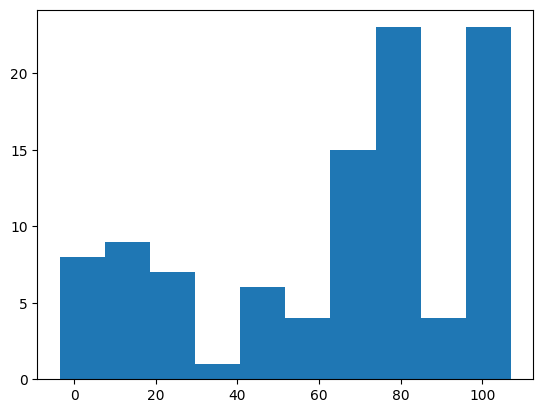

In [380]:
plt.hist(resample)

(array([35., 34., 12.,  7., 12., 25., 61., 46., 42., 43.]),
 array([  1.46412892,  12.1384161 ,  22.81270328,  33.48699046,
         44.16127763,  54.83556481,  65.50985199,  76.18413917,
         86.85842634,  97.53271352, 108.2070007 ]),
 <BarContainer object of 10 artists>)

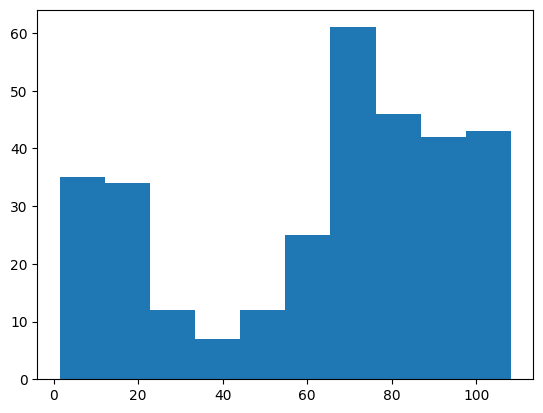

In [381]:
plt.hist(interp)

In [333]:
right['angle_to_leftport'].to_numpy()

array([array([60.284681725774746, 58.24885519463886, 55.8830702165867,
              54.86734402846279, 50.68808561494337, 43.63708037753069,
              39.60087763105584, 38.25195796518838, 37.827345102227476,
              39.077329347434805, 39.13886026015016, 35.06254690254209,
              41.447607214945364, 38.25789820997558, 32.43321025860571,
              29.629648836121387, 21.918600369803467, 15.709314019057956,
              5.387749742707438, 3.0656920000609094, 4.008540940194505,
              10.116309776812457, 2.3416872463669107, 0.15078326100021067,
              7.720480308906489, 3.0917210708235427, 0.9298642628900593,
              6.589988858739347, 3.2999831239936257, 1.5870131211532883,
              6.336560522620196, 3.4444987051426414, 7.547614922539122,
              6.691137337433026, 1.024035083765503, 4.678516861728382,
              5.778770736452186, 10.819955253639597, 13.311930214124574,
              8.457272907936288, 6.757810670073413, 6.00603

In [332]:
right = df[df['odd']=='right']
plt.hist(np.mean(right['angle_to_leftport'].to_numpy()))

ValueError: operands could not be broadcast together with shapes (87,) (83,) 

In [320]:
len(row['ts_rightear_x_cm'])

61

In [322]:
row['ts_rightear_x_cm'][60]

53.225767982465165

In [308]:
center = [np.mean([row['ts_rightear_x_cm'][ind],row['ts_leftear_x_cm'][ind]]),np.mean([row['ts_rightear_y_cm'][ind],row['ts_leftear_y_cm'][ind]])]

In [312]:
nose_points

NameError: name 'nose_points' is not defined

In [311]:
angleright = calculate_angle(center, nose_points, rightport)

NameError: name 'nose_points' is not defined

In [303]:
row['ts_rightear_x_cm'][ind]

33.425913061235306

In [307]:
get_angle_to_ports(df)

IndexError: index 61 is out of bounds for axis 0 with size 61

In [288]:
print(test['angle_to_rightport'],test['angle_to_leftport'])

[36.15272014480458 31.394204433696938 23.468118783952193 16.25154541958618
 15.605385672796162 13.03370211303123 16.355424164110385
 16.394255488620413 13.619939582407207 13.670670791425133
 17.06321290572139 16.451340101846426 9.211696988335625 8.914919059889185
 17.23830590852591 27.776107664482208 21.197825941712672 20.81752432148651
 22.021093104466235 21.036611145215364 21.226854910030337
 18.51592597715545 16.22537667629985 19.609547530229246 21.72514937808484
 14.98550978638819 13.782139536436581 19.45163175481157 15.098041602211593
 8.86171989189971 10.653297863044155 17.136646465065326 18.011558255914593
 15.483385561116327 14.249113778555087 17.77094290574373
 15.651120523751514 9.77850983641512 16.820657094593653 17.87686816269307
 20.476984420580102 20.940540577056527 21.030699526836816
 19.79275687123449 20.06466186351441 17.932842186509355 13.423690627080925
 6.51192566418903 3.76406367913519 1.07622680808159 1.6308269242094275
 2.7352297839810094 4.284363762806546 2.0664

(0.0, 180.0)

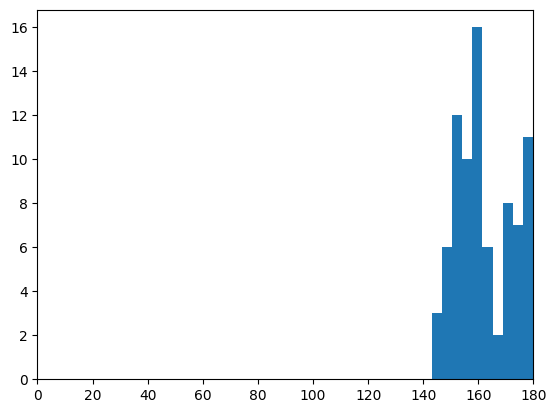

In [296]:
plt.hist(test['angle_to_rightport'])
plt.xlim(0,180)

(0.0, 180.0)

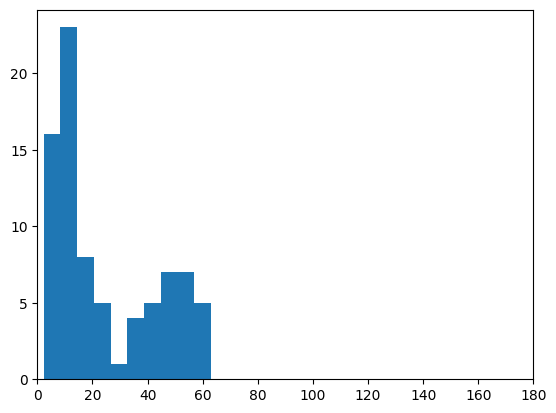

In [297]:
plt.hist(test['angle_to_leftport'])
plt.xlim(0,180)

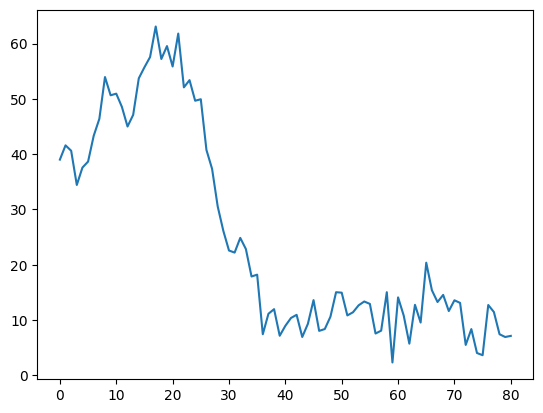

In [298]:
plt.plot(test['angle_to_leftport'])

In [168]:
def get_head_angle(self):
        for ind, row in df.iterrows():
            leftear_x = row['ts_leftear_x_cm']
            leftear_y = row['ts_leftear_y_cm']
            rightear_x = row['ts_rightear_x_cm']
            rightear_y = row['ts_rightear_y_cm']
            nose_x = row['ts_nose_x_cm']
            nose_y = row['ts_nose_y_cm']
            angs = []
            for step in range(len(leftear_x)):
                #ang = np.arctan2(np.mean([leftear_y[step],rightear_y[step]])-nose_y[step],np.mean([leftear_x[step],rightear_x[step]])-nose_x[step])
                ang = np.arctan2(nose_y[step]-np.mean([leftear_y[step],rightear_y[step]]),nose_x[step]-np.mean([leftear_x[step],rightear_x[step]]))

                angs.append(ang)
            df.at[ind, 'head_angle'] = np.array(angs).astype(object)

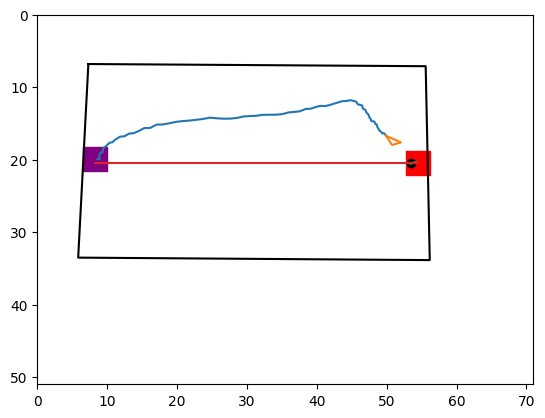

In [294]:
plt.plot(df.at[33,'ts_nose_x_cm'],df.at[33,'ts_nose_y_cm'])
plt.plot([df.at[33,'ts_nose_x_cm'][0],df.at[33,'ts_rightear_x_cm'][0],df.at[33,'ts_leftear_x_cm'][0],df.at[33,'ts_nose_x_cm'][0]],
         [df.at[33,'ts_nose_y_cm'][0],df.at[33,'ts_rightear_y_cm'][0],df.at[33,'ts_leftear_y_cm'][0],df.at[33,'ts_nose_y_cm'][0]])
plt.ylim([51,0]); plt.xlim([0, 71])
plt.plot([arena_x[0],arena_x[1],arena_x[2],arena_x[3],arena_x[0]],
          [arena_y[0],arena_y[1],arena_y[2],arena_y[3],arena_y[0]],c='k')
plt.scatter(left_port[0],left_port[1],c='purple',s=300,marker = 's')
plt.scatter(right_port[0],right_port[1],c='r',s=300,marker = 's')

plt.plot([center[0],vector1[0],vector2[0],center[0]],
         [center[1],vector1[1],vector2[1],center[1]])

plt.plot([test['mean_leftportT_x_cm'],test['mean_rightportT_x_cm']],[test['mean_rightportT_y_cm'],test['mean_rightportT_y_cm']])
plt.plot([mouse_x1,mouse_x2],[mouse_y1,mouse_y2],c='k')

plt.scatter(center[0],center[1],c= 'k')

#plt.scatter(center[0],center[1],s=100,c='g')

#plt.scatter(vector1[0],vector1[1],s=100,c='y')


#plt.scatter(vector2[0],vector2[1],s=100,c='b')



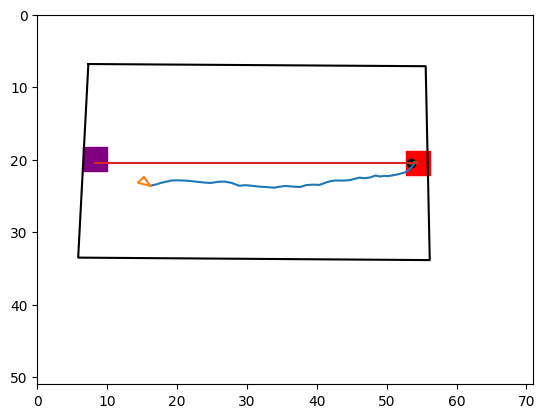

In [269]:
plt.plot(df.at[4,'ts_nose_x_cm'],df.at[4,'ts_nose_y_cm'])
plt.plot([df.at[4,'ts_nose_x_cm'][0],df.at[4,'ts_rightear_x_cm'][0],df.at[4,'ts_leftear_x_cm'][0],df.at[4,'ts_nose_x_cm'][0]],
         [df.at[4,'ts_nose_y_cm'][0],df.at[4,'ts_rightear_y_cm'][0],df.at[4,'ts_leftear_y_cm'][0],df.at[4,'ts_nose_y_cm'][0]])
plt.ylim([51,0]); plt.xlim([0, 71])
plt.plot([arena_x[0],arena_x[1],arena_x[2],arena_x[3],arena_x[0]],
          [arena_y[0],arena_y[1],arena_y[2],arena_y[3],arena_y[0]],c='k')
plt.scatter(left_port[0],left_port[1],c='purple',s=300,marker = 's')
plt.scatter(right_port[0],right_port[1],c='r',s=300,marker = 's')

plt.plot([center[0],vector1[0],vector2[0],center[0]],
         [center[1],vector1[1],vector2[1],center[1]])

plt.plot([test['mean_leftportT_x_cm'],test['mean_rightportT_x_cm']],[test['mean_rightportT_y_cm'],test['mean_rightportT_y_cm']])
plt.plot([mouse_x1,mouse_x2],[mouse_y1,mouse_y2],c='k')

plt.scatter(center[0],center[1],c= 'k')

#plt.scatter(center[0],center[1],s=100,c='g')

#plt.scatter(vector1[0],vector1[1],s=100,c='y')


#plt.scatter(vector2[0],vector2[1],s=100,c='b')





In [243]:
ang=[]
for indx in range(len(test['ts_nose_x_cm'])):
    mouse_x1 = test['ts_nose_x_cm'][indx]
    mouse_y1 = test['ts_nose_y_cm'][indx]
    mouse_x2 = mouse_x1-200 * np.cos(test['head_angle'][indx])
    mouse_y2 = mouse_y1-200* np.sin(test['head_angle'][indx])

    center = intersect((mouse_x1,mouse_y1),(mouse_x2,mouse_y2),(test['mean_leftportT_x_cm'],test['mean_rightportT_y_cm']),(test['mean_rightportT_x_cm'],test['mean_rightportT_y_cm']))
    current_ang = getAngle([test['ts_nose_x_cm'][indx],test['ts_nose_y_cm'][indx]], center, [test['mean_rightportT_x_cm'],test['mean_rightportT_y_cm']])
    ang.append(current_ang)
test['ang_to_port'] = np.array(ang).astype(object)


In [250]:
test1 = df.iloc[33]

In [257]:
ang=[]
mousex1=[]
mousey1=[]
mousex2=[]
mousey2=[]
for indx in range(len(test1['ts_nose_x_cm'])):
    mouse_x1 = test1['ts_nose_x_cm'][indx]
    mouse_y1 = test1['ts_nose_y_cm'][indx]
    mouse_x2 = mouse_x1-200 * np.cos(test1['head_angle'][indx])
    mouse_y2 = mouse_y1-200* np.sin(test1['head_angle'][indx])
    
    mousex1.append(mouse_x1)
    mousey1.append(mouse_y1)
    mousex2.append(mouse_x2)
    mousey2.append(mouse_y2)

    center = intersect((mouse_x1,mouse_y1),(mouse_x2,mouse_y2),(test1['mean_leftportT_x_cm'],test1['mean_rightportT_y_cm']),(test1['mean_rightportT_x_cm'],test1['mean_rightportT_y_cm']))
    current_ang = getAngle([test1['ts_nose_x_cm'][indx],test1['ts_nose_y_cm'][indx]], center, [test1['mean_leftportT_x_cm'],test1['mean_leftportT_y_cm']])
    ang.append(current_ang)
test1['ang_to_port'] = np.array(ang).astype(object)

In [265]:
test1['ang_to_port'][45] 

42.13251627426431

In [247]:
ang=[]
mousex1=[]
mousey1=[]
mousex2=[]
mousey2=[]
for indx in range(len(test['ts_nose_x_cm'])):
    mouse_x1 = test['ts_nose_x_cm'][indx]
    mouse_y1 = test['ts_nose_y_cm'][indx]
    mouse_x2 = mouse_x1-200 * np.cos(test['head_angle'][indx])
    mouse_y2 = mouse_y1-200* np.sin(test['head_angle'][indx])



    center = intersect((mouse_x1,mouse_y1),(mouse_x2,mouse_y2),(test['mean_leftportT_x_cm'],test['mean_rightportT_y_cm']),(test['mean_rightportT_x_cm'],test['mean_rightportT_y_cm']))
    current_ang = getAngle(center,[test['ts_nose_x_cm'][indx],test['ts_nose_y_cm'][indx]], [test['mean_rightportT_x_cm'],test['mean_rightportT_y_cm']])
    ang.append(current_ang)
test['ang_to_port'] = np.array(ang).astype(object)


In [268]:
test['head_angle']

array([0.57244827616281, 0.48683333575544363, 0.34565928621016284,
       0.22100381073239417, 0.21178579757598537, 0.16897588149315834,
       0.22916753723196306, 0.22645708540684206, 0.17148865158893992,
       0.1672845962165507, 0.22492141151699888, 0.2090765786000087,
       0.07904830729871429, 0.07115347230190266, 0.21597327253355966,
       0.3912042328658745, 0.26709804184637737, 0.2505983461927352,
       0.26500593469695916, 0.24058780042433087, 0.2346073942899346,
       0.18277140415177043, 0.13720929860612396, 0.18978331356892114,
       0.21635712665465967, 0.0930088446553036, 0.06455834444168314,
       0.16092967325191612, 0.0839087968748286, -0.02522880325490747,
       0.001915133321502484, 0.1126161299636838, 0.12141863817133247,
       0.07379864055788898, 0.04953600340018698, 0.09121595280666078,
       0.037887750374671014, -0.07352256635115292, 0.028522247943881578,
       0.03247435475527347, 0.04569222824309621, 0.036937470476214845,
       0.0046443317262638

In [248]:
test['ang_to_port'] 

array([142.4769452651331, 147.49311456576936, 155.6704790190346,
       123.04278158256959, 124.43707876367297, 126.10982496461273,
       162.86330977943007, 162.84668862617536, 129.43619049325443,
       130.11455952473247, 162.0313489477649, 162.68544812988574,
       133.11706475679588, 134.0171685381834, 161.7214722784746,
       150.56342665600255, 157.5863563964736, 158.08561437924547,
       156.68261379366774, 157.4840695821079, 157.1253461493072,
       160.12539691532717, 162.57915088385226, 158.67410172131858,
       156.45620610453642, 137.72567198254987, 137.9798879112225,
       158.6366366323569, 163.5492259270848, 140.1129969180238,
       140.1367263799906, 160.87683359169384, 159.4278662088154,
       162.09294879658708, 140.33112629775815, 159.3293883668914,
       138.42604840951395, 139.40631801395682, 136.3545375150167,
       135.53691561463404, 154.4080974112873, 131.02547749488483,
       128.80262374099797, 126.64494313654187, 122.154495903542,
       121.062

(array([ 4.,  3.,  4.,  4., 12., 12., 16.,  0.,  1.,  2.]),
 array([-32.79887021, -27.98032767, -23.16178512, -18.34324258,
        -13.52470003,  -8.70615749,  -3.88761494,   0.93092761,
          5.74947015,  10.5680127 ,  15.38655524]),
 <BarContainer object of 10 artists>)

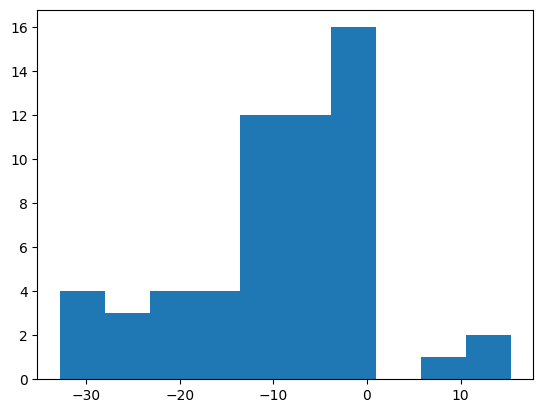

In [233]:
plt.hist(test['ang_to_port'] )

In [223]:
range(len(test['ts_nose_x_cm']))

range(0, 58)

In [193]:
center

(11.227239836589526, 20.455670130531633)

In [184]:
vector2

array([54.4737112 , 20.45567013])

In [203]:
print(getAngle([test['ts_nose_x_cm'][0],test['ts_nose_y_cm'][0]], center, [test['mean_rightportT_x_cm'],test['mean_rightportT_y_cm']]))

327.2011297863316


In [202]:
327.2011297863316 - 360

-32.79887021366841

In [195]:
print(getAngle(vector1, center, vector2))

327.2011297863316


In [ ]:
def get_obstacle_intersect_nose(self):
        for ind,row in self.df.iterrows():
            if row['odd'] == False:
                points_x = np.zeros(len(row['head_angle']))
                points_y = np.zeros(len(row['head_angle']))
                obstacle_top= (row['gt_obstacleTR_x_cm'],row['gt_obstacleTR_y_cm'] -6)
                obstacle_bottom=(row['gt_obstacleBR_x_cm'],row['gt_obstacleBR_y_cm'] +6)
                for indx,i in enumerate(row['head_angle']):
                    current_ang= i
                    mouse_x1 = row['ts_nose_x_cm'][indx]
                    mouse_y1 = row['ts_nose_y_cm'][indx]
                    mouse_x2 = mouse_x1+200 * np.cos(current_ang)
                    mouse_y2 = mouse_y1+200* np.sin(current_ang)
                    intersect_point=intersect((mouse_x1,mouse_y1),(mouse_x2,mouse_y2),obstacle_top,obstacle_bottom)
                    points_x[indx] = intersect_point[0]
                    points_y[indx] = intersect_point[1]
            if row['odd'] == True:
                points_x = np.zeros(len(row['head_angle']))
                points_y = np.zeros(len(row['head_angle']))
                obstacle_top= (row['gt_obstacleTL_x_cm'],row['gt_obstacleTL_y_cm']-6)
                obstacle_bottom=(row['gt_obstacleBL_x_cm'],row['gt_obstacleBL_y_cm']+6)
                for indx,i in enumerate(row['head_angle']):
                    current_ang= i
                    mouse_x1 = row['ts_nose_x_cm'][indx]
                    mouse_y1 = row['ts_nose_y_cm'][indx]
                    mouse_x2 = mouse_x1+200 * np.cos(current_ang)
                    mouse_y2 = mouse_y1+200* np.sin(current_ang)
                    intersect_point=intersect((mouse_x1,mouse_y1),(mouse_x2,mouse_y2),obstacle_top,obstacle_bottom)
                    points_x[indx] = intersect_point[0]
                    points_y[indx] = intersect_point[1]
            points_x_all= np.nan_to_num(points_x)
            points_y_all= np.nan_to_num(points_y)
            points_x = points_x_all[points_x_all!=0]
            #points_x = points_x[~np.isnan(points_x)]
            points_y = points_y_all[points_y_all!=0]
            #points_y = points_y[~np.isnan(points_y)]
            self.df.at[ind,'all_obstacle_intersect_nose_x'] = points_x_all.astype(object)
            self.df.at[ind,'all_obstacle_intersect_nose_y'] = points_y_all.astype(object)
            self.df.at[ind,'obstacle_intersect_nose_x'] = points_x.astype(object)
            self.df.at[ind,'obstacle_intersect_nose_y'] = points_y.astype(object)

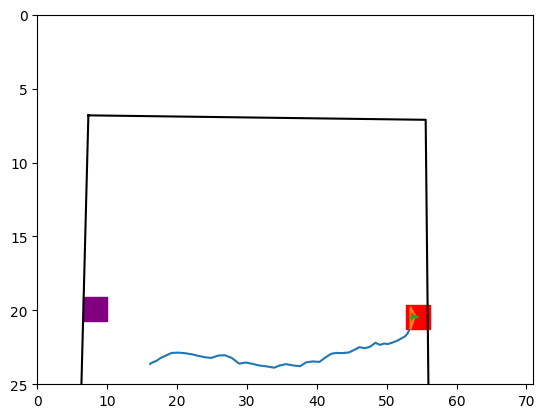

In [155]:
plt.plot(df.at[4,'ts_nose_x_cm'],df.at[4,'ts_nose_y_cm'])
plt.plot([df.at[4,'ts_nose_x_cm'][-1],df.at[4,'ts_rightear_x_cm'][-1],df.at[4,'ts_leftear_x_cm'][-1],df.at[4,'ts_nose_x_cm'][-1]],
         [df.at[4,'ts_nose_y_cm'][-1],df.at[4,'ts_rightear_y_cm'][-1],df.at[4,'ts_leftear_y_cm'][-1],df.at[4,'ts_nose_y_cm'][-1]])
plt.ylim([25,0]); plt.xlim([0, 71])
plt.plot([arena_x[0],arena_x[1],arena_x[2],arena_x[3],arena_x[0]],
          [arena_y[0],arena_y[1],arena_y[2],arena_y[3],arena_y[0]],c='k')
plt.scatter(left_port[0],left_port[1],c='purple',s=300,marker = 's')
plt.scatter(right_port[0],right_port[1],c='r',s=300,marker = 's')

plt.plot([center[0],vector1[0],vector2[0],center[0]],
         [center[1],vector1[1],vector2[1],center[1]])

#plt.scatter(center[0],center[1],s=100,c='g')

#plt.scatter(vector1[0],vector1[1],s=100,c='y')


#plt.scatter(vector2[0],vector2[1],s=100,c='b')




In [211]:
test = df.iloc[4]